# PROJET 9 : Produisez une étude de marché avec R ou Python

![La Poule qui Chante](la_poule_qui_chante.png)

## ETAPE 1: Importation des librairies et chargement des fichiers 

In [1]:
#Importations des librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Chargement du fichier La_poule_qui_chante
La_poule_qui_chante = pd.read_csv('La_poule_qui_chante.csv', sep=',')
#Utiliser la colonne Zone comme index 
La_poule_qui_chante = La_poule_qui_chante.set_index('Zone')

La_poule_qui_chante.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                         57.0               132.185185   
Afrique du Sud                    2118.0                63.000000   
Albanie                             47.0                 0.000000   
Algérie                            277.0                 0.000000   
Allemagne                         1739.0               646.000000   

                Importations - Quantité  Production  Population  \
Zone                                                              
Afghanistan                        29.0        28.0  36296113.0   
Afrique du Sud                    514.0      1667.0  57009756.0   
Albanie                            38.0        13.0   2884169.0   
Algérie                             2.0       275.0  41389189.0   
Allemagne                         842.0      1514.0  82658409.0   

                PIB_par_habitant  Stabilite politique  
Zone                                                   
Afghanistan               2956.8                -2.79  
Afrique du Sud           14823.6                -0.28  
Albanie                  14229.3                 0.37  
Algérie                  13805.4                -0.92  
Allemagne                61563.6                 0.57

## ETAPE 2: Analyse en composante principale (A.C.P)

### 📌 Objectif de l'analyse en composantes principales (ACP)

L'objectif de cette **analyse en composantes principales** (ACP) est de réduire la **dimensionnalité des données** tout en conservant un maximum d'information. Cette méthode permet d'obtenir une **visualisation des pays** en fonction de leur **similarité** en projetant les données sur un graphique des individus.

Cela nous offrira une première **analyse visuelle** des relations entre les pays en fonction de leurs caractéristiques.

Pour ce faire, nous utiliserons trois graphiques principaux :

- **L'éboulis des valeurs propres** : Ce graphique nous permettra de visualiser le **pourcentage de variance** expliqué par chaque composante principale et de déterminer combien de composantes conserver.
  
- **Le cercle des corrélations** : Ce graphique aide à comprendre **les relations** entre les variables et leur **contribution** à chaque axe du graphique des individus.

- **Le graphique des individus** : Ce graphique nous offrira une **projection visuelle des pays** en fonction de leurs caractéristiques, permettant de les classer selon leurs similarités.


In [3]:
# Nous allons ensuite séparer nos données. D'un coté X la matrice des données de notre dataframe :

X = La_poule_qui_chante.values
X[:5]

array([[ 1.53000000e+00,  5.70000000e+01,  1.32185185e+02,
         2.90000000e+01,  2.80000000e+01,  3.62961130e+07,
         2.95680000e+03, -2.79000000e+00],
       [ 3.56900000e+01,  2.11800000e+03,  6.30000000e+01,
         5.14000000e+02,  1.66700000e+03,  5.70097560e+07,
         1.48236000e+04, -2.80000000e-01],
       [ 1.63600000e+01,  4.70000000e+01,  0.00000000e+00,
         3.80000000e+01,  1.30000000e+01,  2.88416900e+06,
         1.42293000e+04,  3.70000000e-01],
       [ 6.38000000e+00,  2.77000000e+02,  0.00000000e+00,
         2.00000000e+00,  2.75000000e+02,  4.13891890e+07,
         1.38054000e+04, -9.20000000e-01],
       [ 1.94700000e+01,  1.73900000e+03,  6.46000000e+02,
         8.42000000e+02,  1.51400000e+03,  8.26584090e+07,
         6.15636000e+04,  5.70000000e-01]])

In [4]:
# C'est bien un np.array :

type(X)

numpy.ndarray

In [5]:
# Vérifions que la taille de notre matrice est conforme à nos attentes :

X.shape

(172, 8)

In [6]:
# Nous enregistrons les noms de pays dans une variable pays 
pays = La_poule_qui_chante.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=172)

In [7]:
# Ainsi que nos colonnes, nos utilisations, dans une variable utilisations 
utilisations = La_poule_qui_chante.columns
utilisations

Index(['Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'Population',
       'PIB_par_habitant', 'Stabilite politique'],
      dtype='object')

In [8]:
# Commençons par scaler les données. On instancie :

scaler = StandardScaler()

In [9]:
# On fit et on transforme (centrage réduction)

X_scaled = scaler.fit_transform(X)

In [10]:
# On espère avoir une moyenne à 0 et un écart type à 1 :

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]



0    1    2    3    4    5    6    7
mean -0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
# Nous allons travailler sur les 6 premieres composantes

n_components = 6

In [12]:
# On instancie notre ACP

pca = PCA(n_components=n_components)

In [13]:
# On l'entraine sur des données scalées

pca.fit(X_scaled)

PCA(n_components=6)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ 

In [14]:
pca.explained_variance_ratio_

array([0.39510387, 0.2503667 , 0.11742235, 0.0944118 , 0.07140069,
       0.05089734])

**la 1ère composante capte 40% de la variance de nos données initiales, la 2ème 25% etc.**

In [15]:
# Enregistrons cela dans une variable :

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([39.51, 25.04, 11.74,  9.44,  7.14,  5.09])

Les 2 premières composantes captent donc 40+25 = 65% de la variance, les 3 premières 40+25+12 = 77% de la variance etc etc.

In [16]:
# Dans le jargon, cela s'appelle une somme cumulée. Et pour faire une somme cumulée numpy dispose de la fonction cumsum 
# Réalisons une somme cumulée avec la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum

array([40., 65., 76., 86., 93., 98.])

In [17]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

**Pour choisir le nombre de composantes, nous allons visualiser le diagramme éboulis des valeurs propres.**

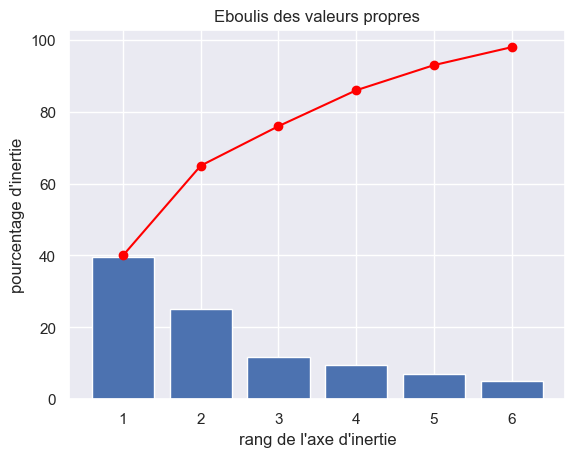

In [18]:
# On peut enfin l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('Eboulis_des_valeurs_propres.png', dpi=300, bbox_inches='tight')
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 76% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

## Composantes

In [19]:
# Intéressons nous maintenant aux composantes. 
# La formule du calcul des composantes est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

pcs = pca.components_
pcs

array([[ 0.16615694,  0.54271966,  0.43263212,  0.19997683,  0.54490114,
         0.36759192,  0.13335409,  0.02935263],
       [ 0.49004668, -0.10672887, -0.00474214,  0.19693363, -0.10266205,
        -0.25991374,  0.55446614,  0.56932461],
       [ 0.2184534 ,  0.01918756,  0.36971337, -0.82374875,  0.13899301,
        -0.27999331, -0.14096465,  0.13810731],
       [-0.16465025,  0.07361959, -0.45676759, -0.41742278,  0.00912705,
         0.62063242,  0.17487114,  0.41078488],
       [ 0.78589044,  0.03121954, -0.33475257,  0.02852493, -0.04077708,
         0.21107205, -0.44222007, -0.16357208],
       [ 0.17134182, -0.01010685, -0.11851807, -0.25424549, -0.01432298,
         0.0531595 ,  0.65471355, -0.67835951]])

In [20]:
#Affichons la même chose mais version pandas
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.166157  0.542720  0.432632  0.199977  0.544901  0.367592  0.133354   
1  0.490047 -0.106729 -0.004742  0.196934 -0.102662 -0.259914  0.554466   
2  0.218453  0.019188  0.369713 -0.823749  0.138993 -0.279993 -0.140965   
3 -0.164650  0.073620 -0.456768 -0.417423  0.009127  0.620632  0.174871   
4  0.785890  0.031220 -0.334753  0.028525 -0.040777  0.211072 -0.442220   
5  0.171342 -0.010107 -0.118518 -0.254245 -0.014323  0.053159  0.654714   

          7  
0  0.029353  
1  0.569325  
2  0.138107  
3  0.410785  
4 -0.163572  
5 -0.678360

In [21]:
# Maintenant réattribuons les noms des variables (utilisations) et nommons les composantes F1, F2 etc :

pcs.columns = utilisations
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Disponibilité alimentaire en quantité (kg/personne/an)  \
F1                                               0.17        
F2                                               0.49        
F3                                               0.22        
F4                                              -0.16        
F5                                               0.79        
F6                                               0.17        

    Disponibilité intérieure  Exportations - Quantité  \
F1                      0.54                     0.43   
F2                     -0.11                    -0.00   
F3                      0.02                     0.37   
F4                      0.07                    -0.46   
F5                      0.03                    -0.33   
F6                     -0.01                    -0.12   

    Importations - Quantité  Production  Population  PIB_par_habitant  \
F1                     0.20        0.54        0.37              0.13   
F2                     0.20       -0.10       -0.26              0.55   
F3                    -0.82        0.14       -0.28             -0.14   
F4                    -0.42        0.01        0.62              0.17   
F5                     0.03       -0.04        0.21             -0.44   
F6                    -0.25       -0.01        0.05              0.65   

    Stabilite politique  
F1                 0.03  
F2                 0.57  
F3                 0.14  
F4                 0.41  
F5                -0.16  
F6                -0.68

In [22]:
# Pivotons la table :

pcs.T

F1        F2  \
Disponibilité alimentaire en quantité (kg/perso...  0.166157  0.490047   
Disponibilité intérieure                            0.542720 -0.106729   
Exportations - Quantité                             0.432632 -0.004742   
Importations - Quantité                             0.199977  0.196934   
Production                                          0.544901 -0.102662   
Population                                          0.367592 -0.259914   
PIB_par_habitant                                    0.133354  0.554466   
Stabilite politique                                 0.029353  0.569325   

                                                          F3        F4  \
Disponibilité alimentaire en quantité (kg/perso...  0.218453 -0.164650   
Disponibilité intérieure                            0.019188  0.073620   
Exportations - Quantité                             0.369713 -0.456768   
Importations - Quantité                            -0.823749 -0.417423   
Production                                          0.138993  0.009127   
Population                                         -0.279993  0.620632   
PIB_par_habitant                                   -0.140965  0.174871   
Stabilite politique                                 0.138107  0.410785   

                                                          F5        F6  
Disponibilité alimentaire en quantité (kg/perso...  0.785890  0.171342  
Disponibilité intérieure                            0.031220 -0.010107  
Exportations - Quantité                            -0.334753 -0.118518  
Importations - Quantité                             0.028525 -0.254245  
Production                                         -0.040777 -0.014323  
Population                                          0.211072  0.053159  
PIB_par_habitant                                   -0.442220  0.654714  
Stabilite politique                                -0.163572 -0.678360

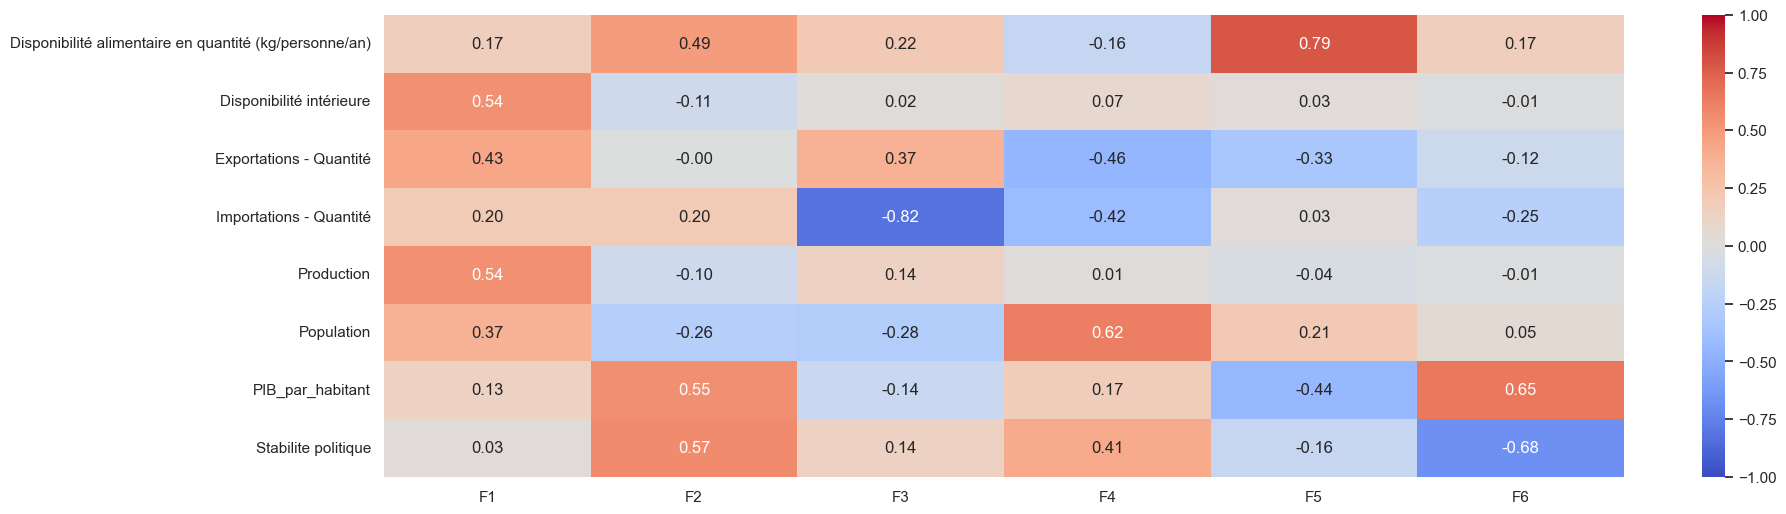

In [23]:
# Et pour une représentation plus visuelle, comme cela :

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('heatmap', dpi=300, bbox_inches='tight')
plt.show()

## Cercle des correlations

In [24]:
# Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes (on commence à compter à partir de 0):

x, y = 0,1

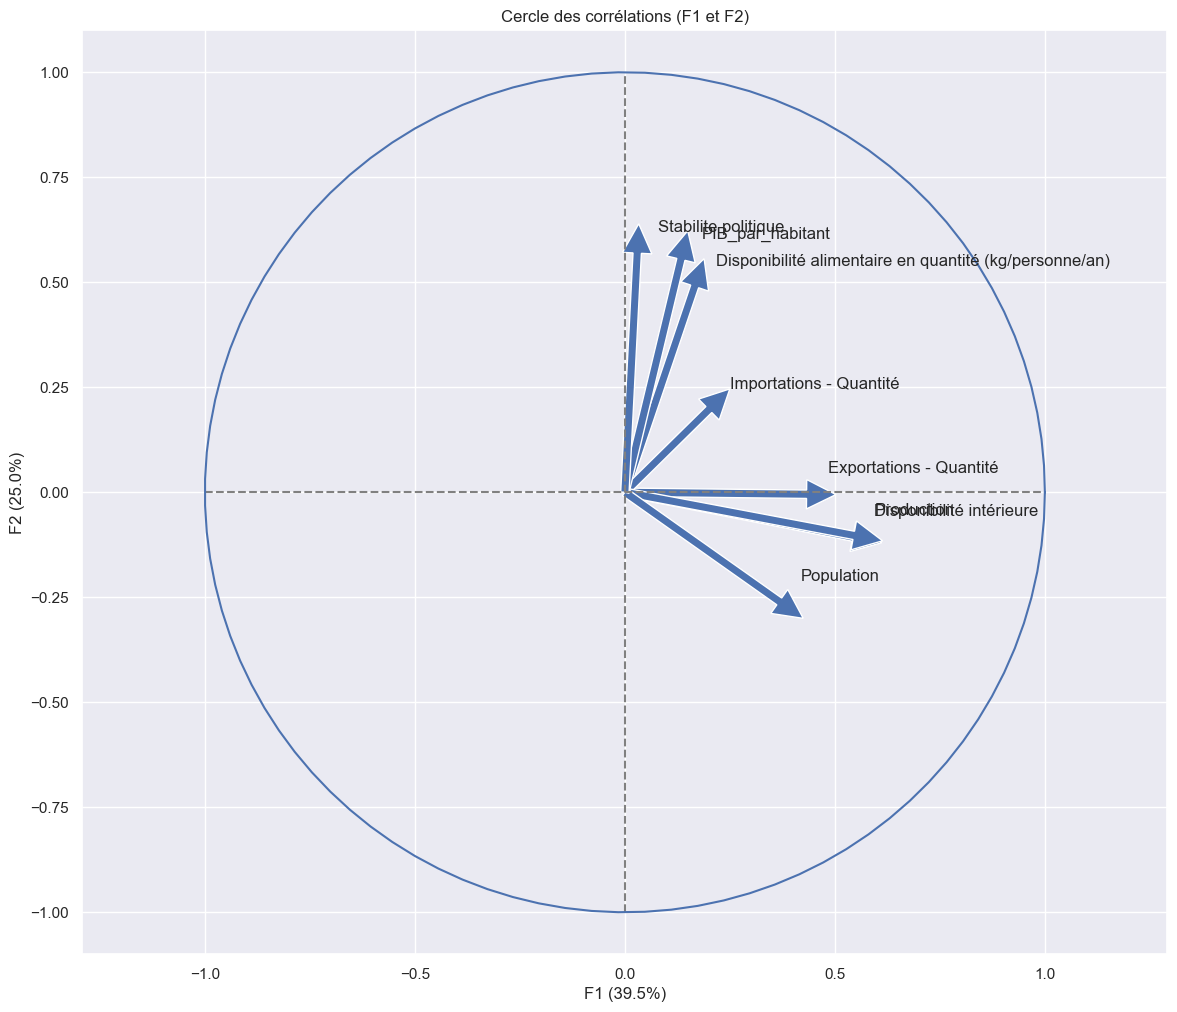

In [25]:
# Pour la partie graphique :

fig, ax = plt.subplots(figsize=(14, 12))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             utilisations[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.savefig('Cercle des corrélations F1 F2', dpi=300, bbox_inches='tight')
plt.show(block=False)

Le **cercle des corrélations** montre que la **composante F1** (39.5% de la variance) est **positivement corrélée** avec des variables telles que la **production**, **les exportations** et la **disponibilité intérieure**, tandis que la **composante F2** (25.6% de la variance) est **positivement corrélée** avec le **PIB par habitant** et la **stabilité politique** mais aussi avec **les importations**. Les pays situés à droite de l'axe F1 ont une **forte production et exportations** (corrélation positive), tandis que ceux en haut de l'axe F2 sont caractérisés par un **niveau économique élevé et une forte stabilité politique** (corrélation positive) mais aussi assez corrélé à l'importation. 

Cette analyse met en évidence deux dimensions distinctes : une liée à **la production et au commerce (F1)**, et l'autre au **niveau économique et à la stabilité politique (F2)**.

In [26]:
# On peut en faire une fonction :

def correlation_graph(pca, 
                      x_y, 
                      utilisations) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(14, 12))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                utilisations[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('Cercle des corrélations F3 F4', dpi=300, bbox_inches='tight')  
    plt.show(block=False)

In [27]:
# Essayons cette fonction pour F2 et F3

x_y = (1,2)
x_y

(1, 2)

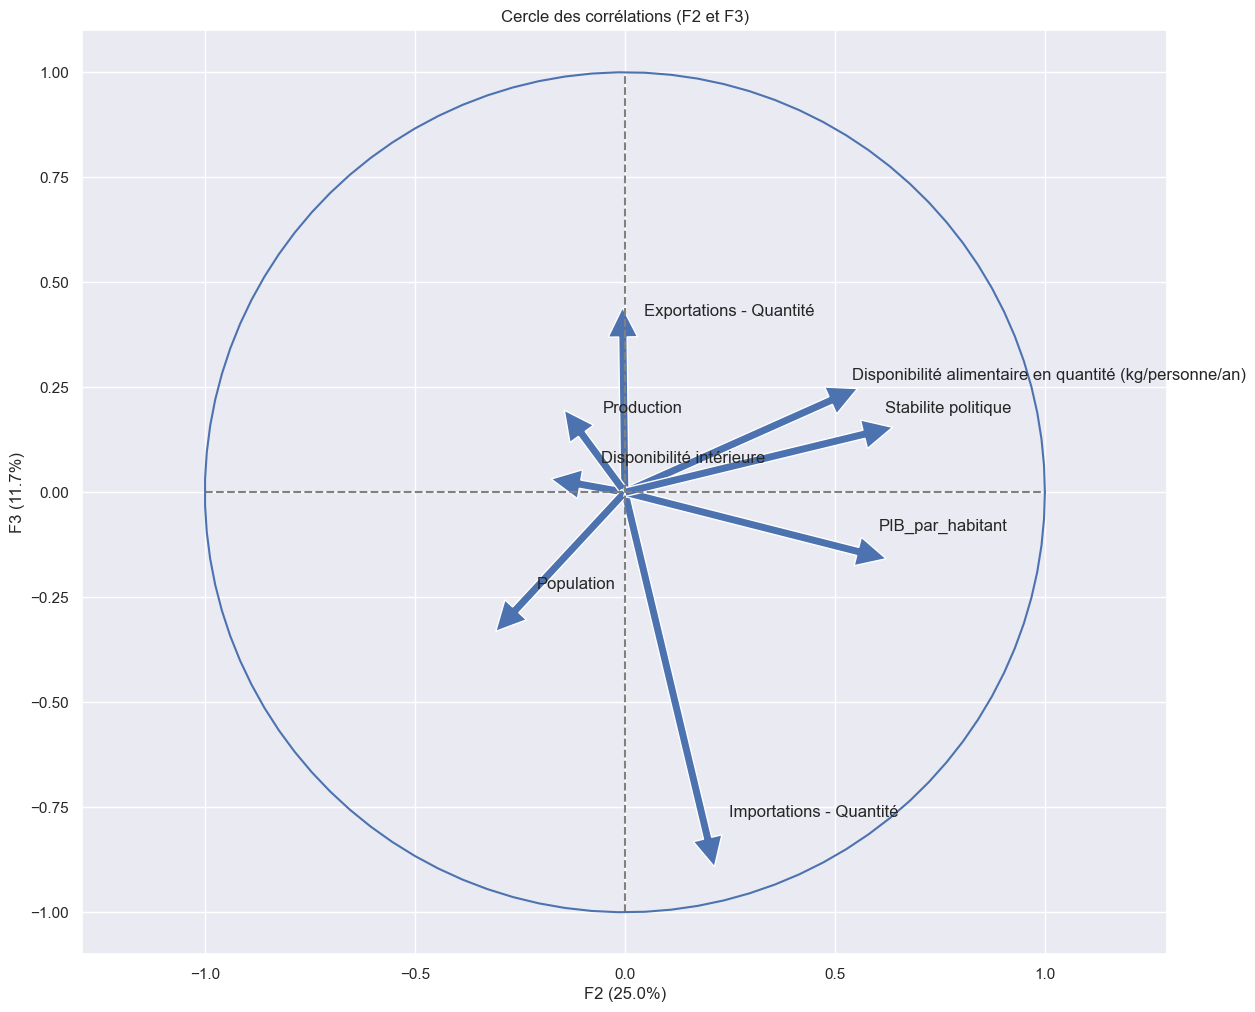

In [28]:
correlation_graph(pca, x_y, utilisations)

La **composante F2** (25.0% de la variance) est **positivement corrélée** avec des variables comme le **PIB par habitant**, la **stabilité politique** et la **disponibilité alimentaire**, indiquant que les pays avec un **PIB élevé ** et une **bonne stabilité politique** se trouvent à **droite de l'axe F2**.

La **composante F3** (11.7% de la variance) est **positivement corrélée** avec la **production**, la **disponibilité intérieure** et les **exportations**, mettant en avant les pays ayant une **forte capacité de production** et des **exportations élevées**, qui se trouvent **en haut de l'axe F3**.

### En résumé :
- **F2** distingue les pays avec un **haut PIB** et une **forte stabilité politique** (corrélation positive à droite de l'axe).
- **F3** distingue les pays avec une **forte production** et **exportations** (corrélation positive en haut de l'axe).

Cela reflète deux dimensions : **économique et politique** (F2) et **production et autosuffisance alimentaire** (F3).


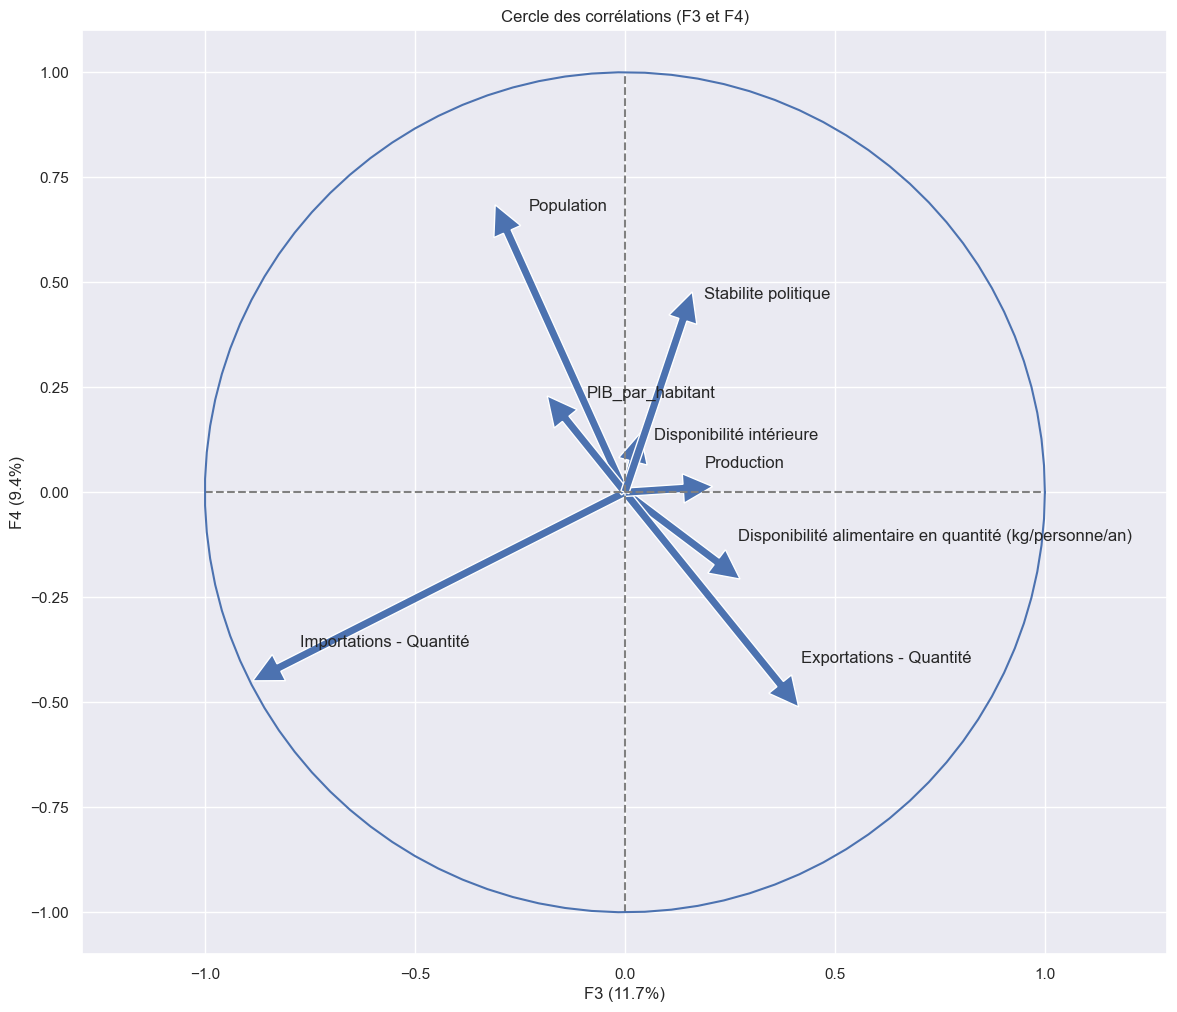

In [29]:
# Essayons pour F3 et F4

correlation_graph(pca, (2,3), utilisations)

**Composante F3** (Horizontal - 11.7% de la variance expliquée) :  
La **composante F3** est **positivement corrélée** avec des variables telles que la **production**, la **disponibilité intérieure** et les **exportations**. Ces variables sont orientées vers la **droite de l'axe F3**, ce qui indique que les pays avec une **forte production** et un **volume élevé d'exportations** se trouvent à droite de l'axe F3.

De plus, la **variable des importations** est **négativement corrélée** à cette composante. Cela signifie que les pays avec un **faible volume d'importations** se trouvent également à droite de l'axe F3, tandis que les pays avec un **fort volume d'importations** se situent sur l'autre côté de l'axe.

Cette dynamique suggère que les pays les plus à droite de l'axe F3 ont une **autonomie alimentaire élevée**, avec une **forte production interne** et des **exportations significatives**, tandis que les pays à gauche de l'axe F3 sont plus dépendants des **importations** pour satisfaire leurs besoins alimentaires. Ainsi, ces pays à droite sont potentiellement plus autosuffisants et peuvent représenter des candidats intéressants pour l'exportation de produits comme la volaille, car ils sont capables de produire à grande échelle et d'exporter.


**Composante F4** (Vertical - 9.4% de la variance expliquée) :  
La **composante F4** est **positivement corrélée** avec des variables comme le **PIB par habitant**, la **stabilité politique**, et la **disponibilité alimentaire**. Ces variables sont orientées vers le **haut de l'axe F4**, ce qui signifie que les pays ayant un **haut PIB** et une **bonne stabilité politique** se situent en haut de l'axe F4. 

### Résumé :
- **F3** distingue les pays avec des **exportations élevées** (à droite de l'axe F3).
- **F4** distingue les pays avec un **haut PIB par habitant** et une **bonne stabilité politique** ainsi qu'un besoin (en haut de l'axe F4).

## Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [30]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.7987805 , -2.82337916, -0.32244544, -1.14344712, -0.04581344,
         1.39714417],
       [ 1.10013768,  0.46597703, -1.6719417 , -1.09640508,  1.10964687,
        -0.49190989],
       [-0.67368674,  0.03141866,  0.22248983,  0.24538839, -0.06479182,
        -0.55023852],
       [-0.65487084, -1.2515884 , -0.00941072, -0.01150835, -0.26526005,
         0.38731198],
       [ 2.0764276 ,  1.98079845, -3.0963077 , -1.40576868, -1.11250244,
        -0.56868089]])

In [31]:
# Et sous forme de Dataframe

data_ACP = pd.DataFrame(data = X_proj, index = pays, columns = ['F1','F2','F3','F4','F5','F6'])
data_ACP

F1        F2        F3        F4        F5  \
Zone                                                                       
Afghanistan            -0.798781 -2.823379 -0.322445 -1.143447 -0.045813   
Afrique du Sud          1.100138  0.465977 -1.671942 -1.096405  1.109647   
Albanie                -0.673687  0.031419  0.222490  0.245388 -0.064792   
Algérie                -0.654871 -1.251588 -0.009411 -0.011508 -0.265260   
Allemagne               2.076428  1.980798 -3.096308 -1.405769 -1.112502   
...                          ...       ...       ...       ...       ...   
Émirats arabes unis     0.578280  2.772654 -1.402119 -0.445637  0.157700   
Équateur               -0.517552 -0.253559  0.355093  0.159874  0.171623   
États-Unis d'Amérique  13.832940  0.139361  3.862927 -1.716378 -1.467209   
Éthiopie               -0.655750 -2.309997 -0.167780 -0.267735 -0.216419   
Îles Salomon           -0.925294 -0.758744  0.245447  0.259318 -0.410837   

                             F6  
Zone                             
Afghanistan            1.397144  
Afrique du Sud        -0.491910  
Albanie               -0.550239  
Algérie                0.387312  
Allemagne             -0.568681  
...                         ...  
Émirats arabes unis    0.608283  
Équateur              -0.107167  
États-Unis d'Amérique  0.275086  
Éthiopie               0.566436  
Îles Salomon          -0.823393  

[172 rows x 6 columns]

In [32]:
# Rappelons que :

x_y

(1, 2)

In [33]:
# Voici la fonction 

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig('Projections des individus sur F1 F2', dpi=300, bbox_inches='tight')  
    plt.show()

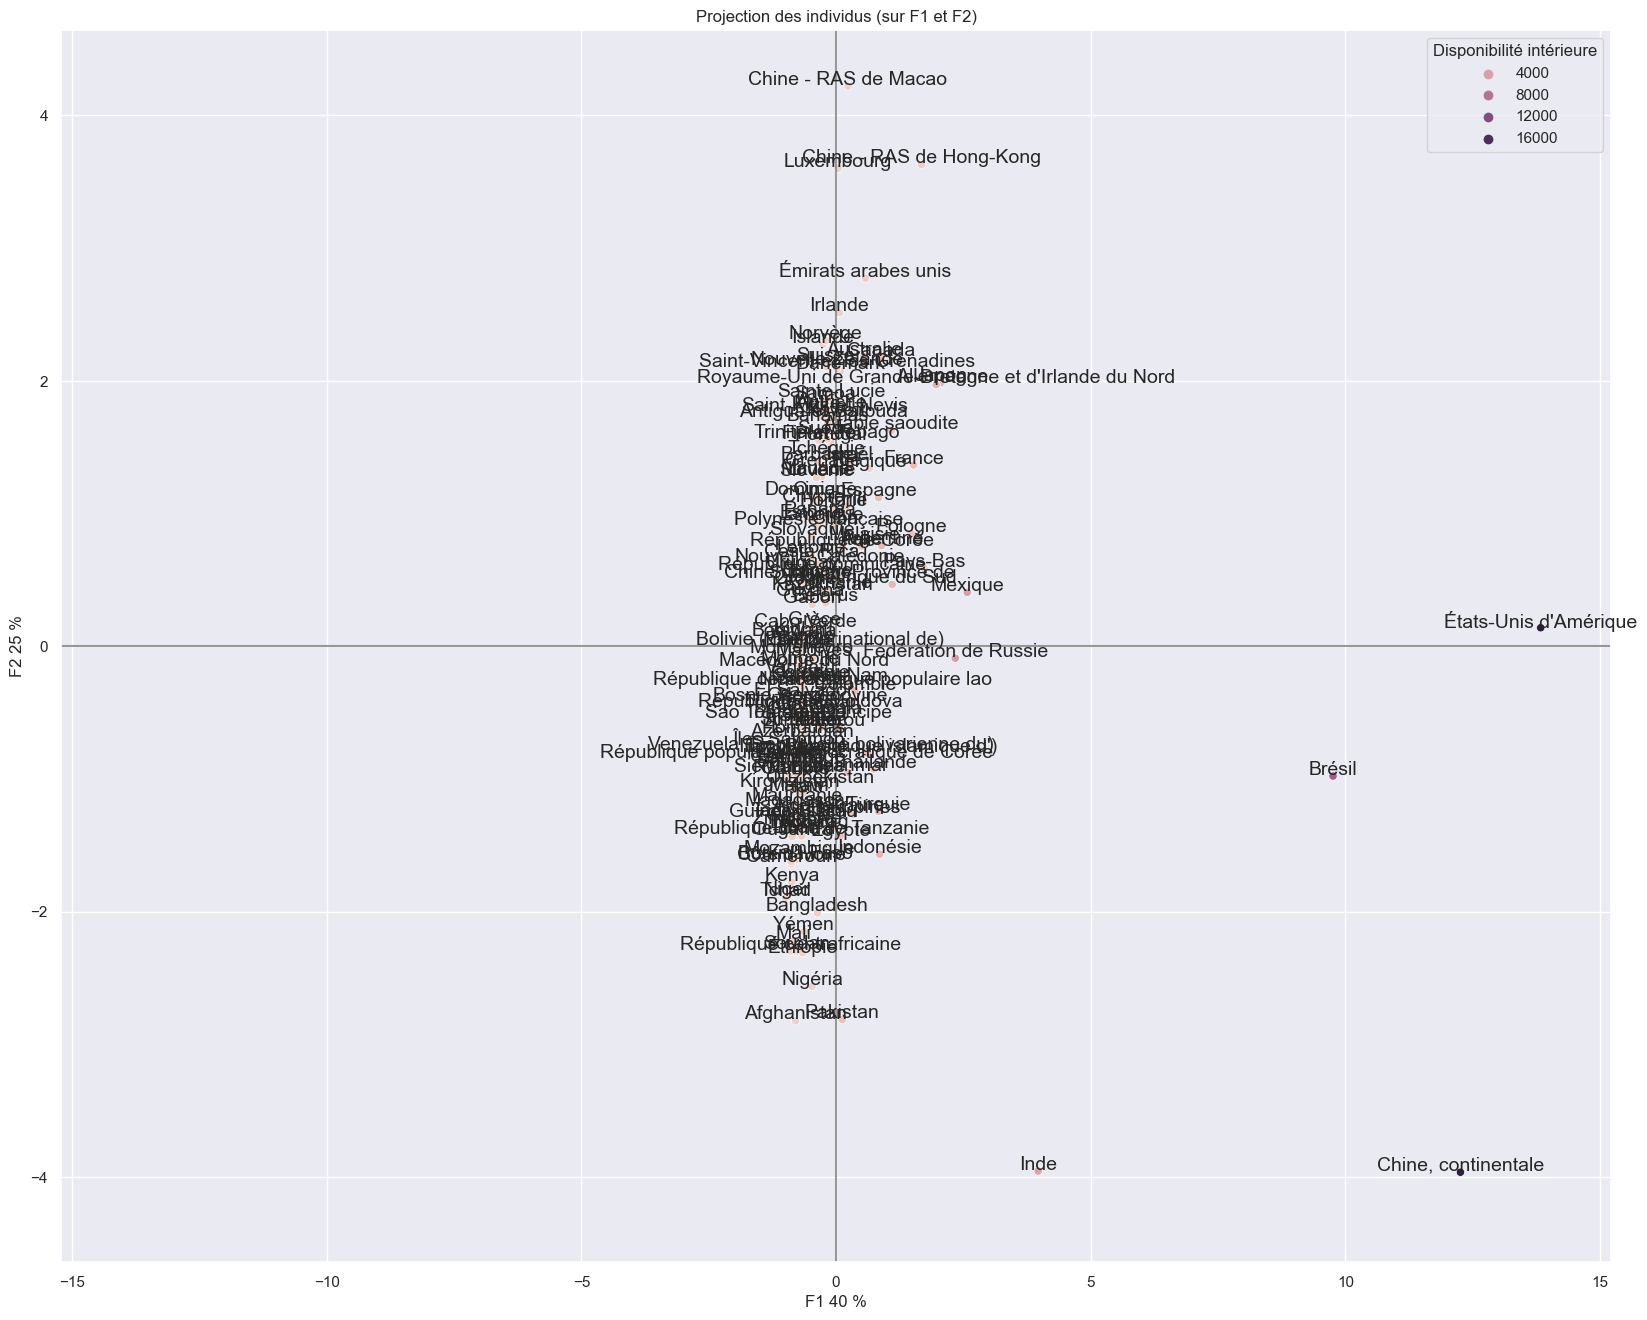

In [34]:
# Regardons ce que cela donne avec F1 et F2 :

x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16), clusters=La_poule_qui_chante['Disponibilité intérieure'], marker="o")

### **Interprétation de la projection des individus sur les composantes principales F1 et F2** :

### **Composante F1 (Horizontal - 40% de la variance expliquée)** :
- **F1** distingue les pays en fonction de leur **production** et de leur **volume d'exportations**. 
- Les pays situés **à droite de l'axe F1** ont une **forte production** et des **exportations élevées**. Cela inclut des pays comme la **Chine**, les **États-Unis**, et **le Brésil**, qui sont de grands producteurs et exportateurs de produits alimentaires.
- **À gauche de l'axe F1**, les pays ont une **production plus faible** et des **exportations réduites**, typiquement des pays ayant moins de capacités dans le secteur alimentaire.

### **Composante F2 (Vertical - 25% de la variance expliquée)** :
- **F2** est associée au **PIB par habitant**, à la **stabilité politique** et à la **disponibilité alimentaire**. 
- Les pays **en haut de l'axe F2** sont caractérisés par un **élevé PIB par habitant** et une **forte stabilité politique**, comme le **Luxembourg** et le **Royaume-Uni**.
- Les pays **en bas de l'axe F2**, comme des pays en développement, ont un **PIB plus bas** et des **défis politiques**.

### **Conclusion** :
- **F1 et F2** offrent une **vue d'ensemble** des pays avec une **forte production alimentaire** et une **bonne stabilité économique et politique**, des caractéristiques clés pour cibler les **pays à l'exportation**.
- Les pays avec un **élevé PIB** et une **forte stabilité politique** sont souvent plus propices à accueillir des exportations alimentaires, tandis que les pays ayant **une faible production** et **un faible PIB** sont moins attractifs pour les exportations.

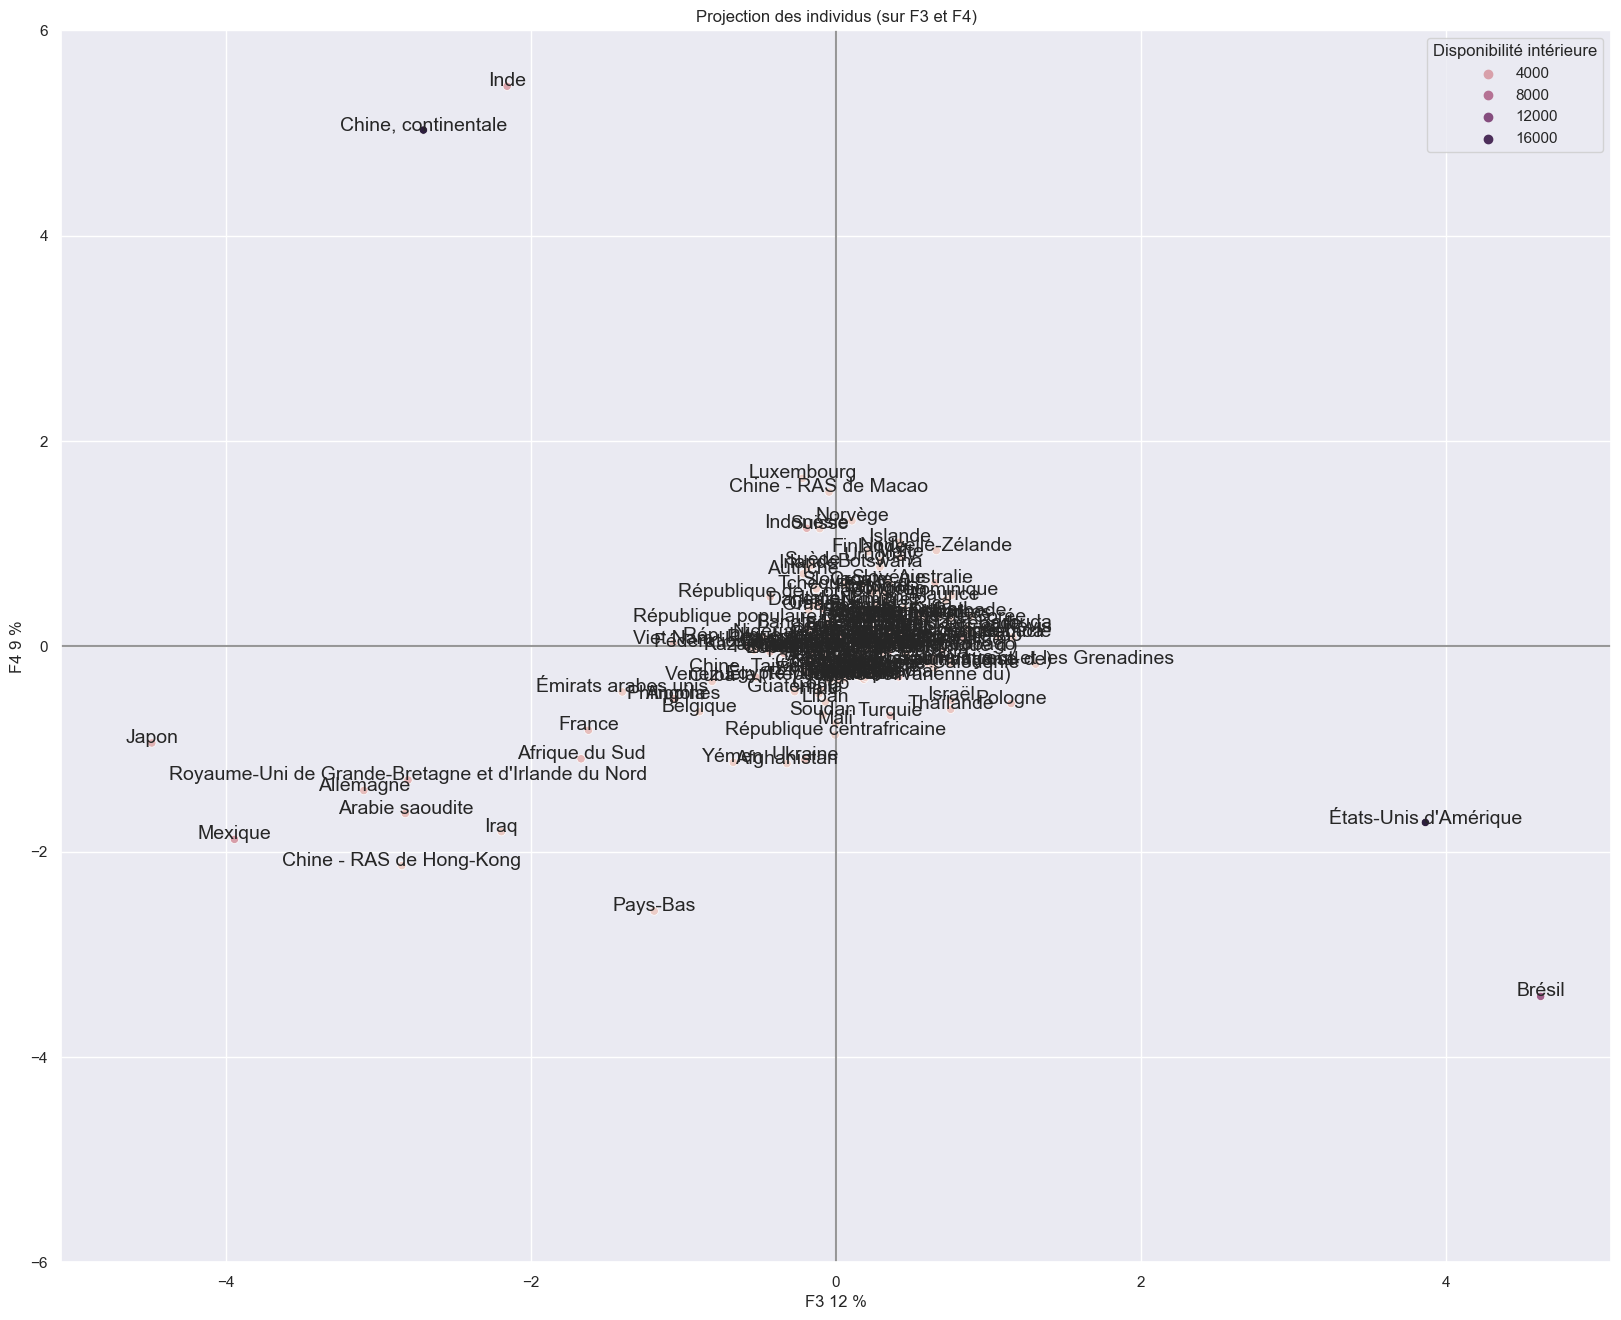

In [35]:
# Essayons avec F3 et F4 :

x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16), clusters=La_poule_qui_chante['Disponibilité intérieure'],marker="o")

### **Interprétation de la projection des individus sur les composantes principales F3 et F4 :**

#### 1. **Composante F3 (Horizontal) - 11.7% de la variance expliquée :**
- La **composante F3** semble être influencée fortement par la variable **importation-quantité**. Elle reflète donc les pays qui **importe beaucoup** de volaille.
**On y trouve en l'occurence le japon, le mexique et le royaume qui sont effectivement le top 5 des pays importateurs.**

#### 2. **Composante F4 (Vertical) - 9.4% de la variance expliquée :**
- La **composante F4** est dominée par la variable **population**. Elle met en évidence les pays ayant une **forte démographie**.

#### **Résumé :**
- **F3** distingue les pays avec **une dépendance aux importations de volaille** (à gauche).
- **F4** met en lumière les pays très peuplés (en haut).

En résumé, cette projection permet de visualiser la **diversité économique et la dépendance alimentaire** entre les pays sur deux axes distincts.


## ETAPE 3: Classification ascendante hierarchique

L'Analyse en Composantes Principales (ACP) nous a permis de réduire la dimensionnalité des données tout en conservant une grande partie de l'information. Cependant, l'ACP ne nous permet pas d'identifier directement des groupes de pays similaires. C'est pourquoi nous poursuivons avec une Analyse de Classification Hiérarchique (CAH), qui nous permettra de regrouper les pays en clusters en fonction de leurs caractéristiques communes, afin de mieux cibler les pays potentiels pour l'exportation de notre volaille made in France.

**LINKAGE**

In [36]:
# Nous allons calculer les distances en spécifiant la méthode à utiliser:

Z = linkage(X_scaled, method="ward")
Z[:10]

array([[5.90000000e+01, 1.48000000e+02, 4.71555367e-02, 2.00000000e+00],
       [1.05000000e+02, 1.49000000e+02, 6.76918432e-02, 2.00000000e+00],
       [2.80000000e+01, 4.10000000e+01, 7.44735752e-02, 2.00000000e+00],
       [1.90000000e+01, 1.28000000e+02, 1.33216701e-01, 2.00000000e+00],
       [1.64000000e+02, 1.71000000e+02, 1.48338792e-01, 2.00000000e+00],
       [1.39000000e+02, 1.47000000e+02, 1.52579015e-01, 2.00000000e+00],
       [9.30000000e+01, 1.26000000e+02, 1.56809084e-01, 2.00000000e+00],
       [2.70000000e+01, 1.52000000e+02, 1.57200828e-01, 2.00000000e+00],
       [8.90000000e+01, 9.10000000e+01, 1.65928901e-01, 2.00000000e+00],
       [2.30000000e+01, 1.01000000e+02, 1.73757643e-01, 2.00000000e+00]])

**DENDROGRAMME**

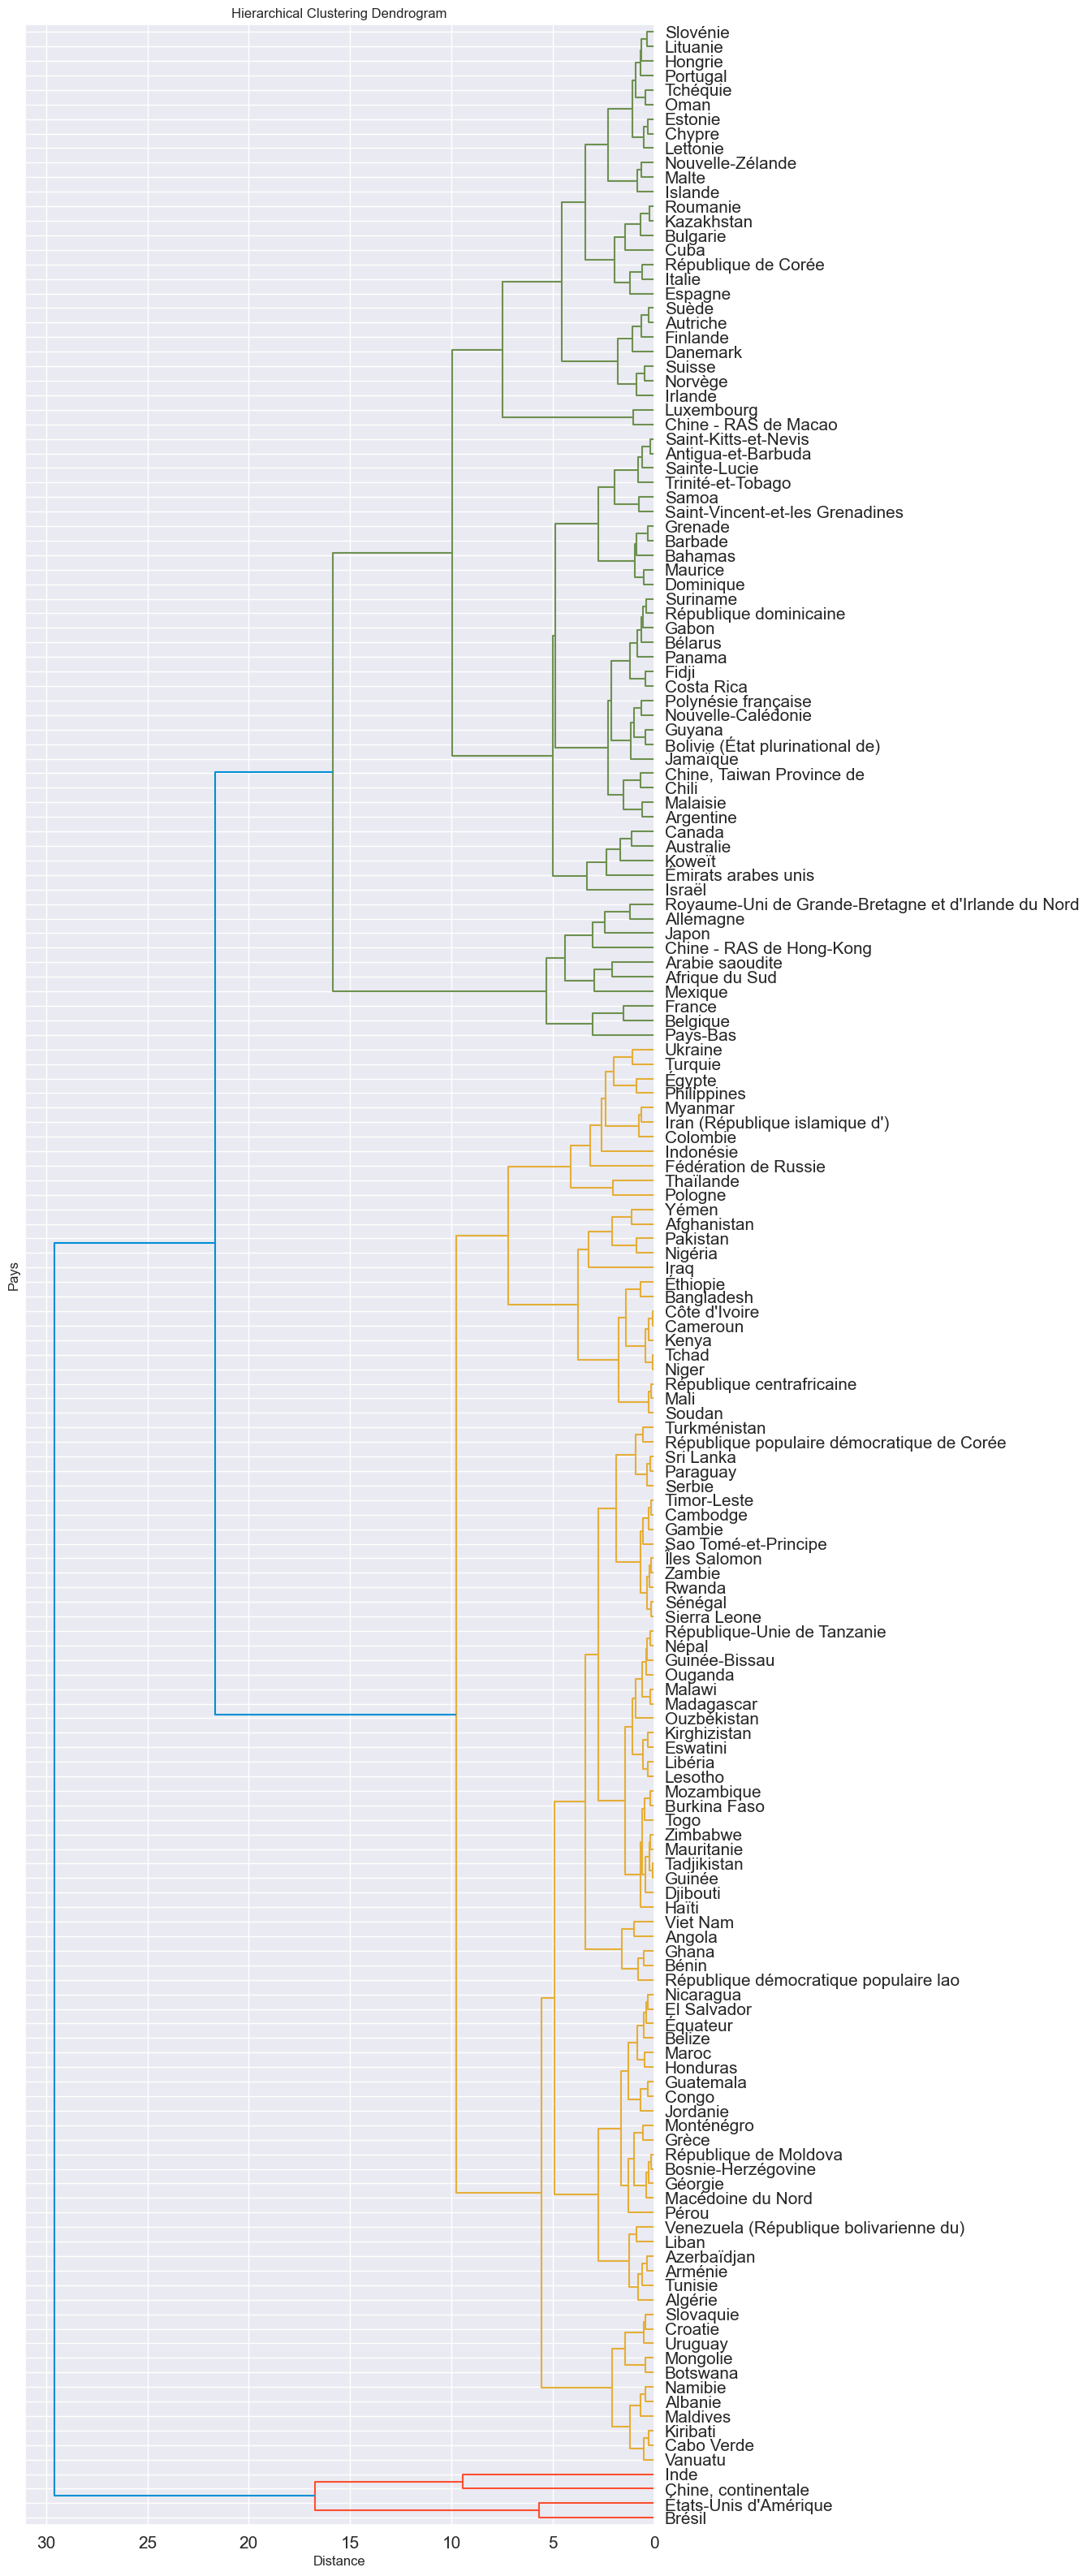

In [37]:
# Nous pouvons désormais afficher le dendrogramme et nous spécifions les labels et l'orientation 

fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=pays, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
plt.style.use("fivethirtyeight")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.savefig('CAH', dpi=300, bbox_inches='tight')  
plt.show()

In [38]:
# Déterminer le nombre de clusters en coupant à une hauteur donnée
clusters = fcluster(Z, t=10, criterion='distance')  # t est la hauteur à couper

In [39]:
clusters

array([3, 4, 3, 3, 4, 3, 5, 4, 5, 3, 5, 5, 3, 5, 3, 5, 4, 3, 5, 3, 3, 1,
       5, 3, 5, 3, 3, 3, 3, 5, 5, 4, 5, 5, 2, 5, 3, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 5, 3, 5, 5, 4, 3, 5, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 5,
       2, 3, 3, 3, 5, 5, 5, 5, 5, 4, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 5, 5,
       3, 3, 5, 3, 3, 3, 5, 3, 5, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5,
       3, 5, 3, 3, 3, 5, 3, 4, 3, 3, 5, 5, 3, 5, 4, 3, 3, 5, 3, 5, 3, 3,
       3, 5, 5, 5, 5, 3, 3, 3, 3, 5, 3, 3, 5, 5, 5, 3, 3, 3, 5, 3, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 1, 3, 3], dtype=int32)

**ANALYSE**

In [40]:
# J'affiche les pays pour chaque cluster

dfc = pd.DataFrame({"pays" : pays, "cluster" : clusters})
dfc.head(10)

pays  cluster
0         Afghanistan        3
1      Afrique du Sud        4
2             Albanie        3
3             Algérie        3
4           Allemagne        4
5              Angola        3
6  Antigua-et-Barbuda        5
7     Arabie saoudite        4
8           Argentine        5
9             Arménie        3

In [41]:
# Effectifs par cluster

effectifs = np.unique(clusters,return_counts = True)
effectifs = pd.DataFrame(effectifs) 
effectifs

0  1   2   3   4
0  1  2   3   4   5
1  2  2  98  10  60

In [42]:
# J'affiche mes clusters

for i in range(1, 6) : 
    # on fait une selection
    sub_dfc = dfc.loc[dfc.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les pays de chaque ligne
    pays_list = sub_dfc.pays.values
   
    # on créé une liste de couple nom/theme
    ziped = zip(pays_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")
    

cluster : 1
('Brésil',) / ("États-Unis d'Amérique",)



cluster : 2
('Chine, continentale',) / ('Inde',)



cluster : 3
('Afghanistan',) / ('Albanie',) / ('Algérie',) / ('Angola',) / ('Arménie',) / ('Azerbaïdjan',) / ('Bangladesh',) / ('Belize',) / ('Bosnie-Herzégovine',) / ('Botswana',) / ('Burkina Faso',) / ('Bénin',) / ('Cabo Verde',) / ('Cambodge',) / ('Cameroun',) / ('Colombie',) / ('Congo',) / ('Croatie',) / ("Côte d'Ivoire",) / ('Djibouti',) / ('El Salvador',) / ('Eswatini',) / ('Fédération de Russie',) / ('Gambie',) / ('Ghana',) / ('Grèce',) / ('Guatemala',) / ('Guinée',) / ('Guinée-Bissau',) / ('Géorgie',) / ('Haïti',) / ('Honduras',) / ('Indonésie',) / ("Iran (République islamique d')",) / ('Iraq',) / ('Jordanie',) / ('Kenya',) / ('Kirghizistan',) / ('Kiribati',) / ('Lesotho',) / ('Liban',) / ('Libéria',) / ('Macédoine du Nord',) / ('Madagascar',) / ('Malawi',) / ('Maldives',) / ('Mali',) / ('Maroc',) / ('Mauritanie',) / ('Mongolie',) / ('Monténégro',) / ('Mozambique',) / ('M

In [43]:
La_poule_qui_chante = La_poule_qui_chante.reset_index()
La_poule_qui_chante

Zone  \
0              Afghanistan   
1           Afrique du Sud   
2                  Albanie   
3                  Algérie   
4                Allemagne   
..                     ...   
167    Émirats arabes unis   
168               Équateur   
169  États-Unis d'Amérique   
170               Éthiopie   
171           Îles Salomon   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                 1.53        
1                                                35.69        
2                                                16.36        
3                                                 6.38        
4                                                19.47        
..                                                 ...        
167                                              43.47        
168                                              19.31        
169                                              55.68        
170                                               0.13        
171                                               4.45        

     Disponibilité intérieure  Exportations - Quantité  \
0                        57.0               132.185185   
1                      2118.0                63.000000   
2                        47.0                 0.000000   
3                       277.0                 0.000000   
4                      1739.0               646.000000   
..                        ...                      ...   
167                     412.0                94.000000   
168                     341.0                 0.000000   
169                   18266.0              3692.000000   
170                      14.0               132.185185   
171                       3.0                 0.000000   

     Importations - Quantité  Production   Population  PIB_par_habitant  \
0                       29.0        28.0   36296113.0            2956.8   
1                      514.0      1667.0   57009756.0           14823.6   
2                       38.0        13.0    2884169.0           14229.3   
3                        2.0       275.0   41389189.0           13805.4   
4                      842.0      1514.0   82658409.0           61563.6   
..                       ...         ...          ...               ...   
167                    433.0        48.0    9487203.0           70048.5   
168                      0.0       340.0   16785361.0           14552.4   
169                    123.0     21914.0  325084756.0           66105.7   
170                      1.0        14.0  106399924.0            2253.0   
171                      6.0         0.0     636039.0            2896.7   

     Stabilite politique  
0                  -2.79  
1                  -0.28  
2                   0.37  
3                  -0.92  
4                   0.57  
..                   ...  
167                 0.60  
168                -0.08  
169                 0.26  
170                -1.68  
171                 0.19  

[172 rows x 9 columns]

In [44]:
dfc

pays  cluster
0              Afghanistan        3
1           Afrique du Sud        4
2                  Albanie        3
3                  Algérie        3
4                Allemagne        4
..                     ...      ...
167    Émirats arabes unis        5
168               Équateur        3
169  États-Unis d'Amérique        1
170               Éthiopie        3
171           Îles Salomon        3

[172 rows x 2 columns]

In [45]:
# Je fusionne les dataframe dfc et La_poule_qui_chante

La_poule_qui_chante_clustering = pd.merge(La_poule_qui_chante, dfc, left_on='Zone', right_on='pays', how='left')



In [46]:
# Je supprime la variable pays qui fait doublon avec la variable Zone
La_poule_qui_chante_clustering.drop(['pays'], axis = 1, inplace = True)
La_poule_qui_chante_clustering


Zone  \
0              Afghanistan   
1           Afrique du Sud   
2                  Albanie   
3                  Algérie   
4                Allemagne   
..                     ...   
167    Émirats arabes unis   
168               Équateur   
169  États-Unis d'Amérique   
170               Éthiopie   
171           Îles Salomon   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                 1.53        
1                                                35.69        
2                                                16.36        
3                                                 6.38        
4                                                19.47        
..                                                 ...        
167                                              43.47        
168                                              19.31        
169                                              55.68        
170                                               0.13        
171                                               4.45        

     Disponibilité intérieure  Exportations - Quantité  \
0                        57.0               132.185185   
1                      2118.0                63.000000   
2                        47.0                 0.000000   
3                       277.0                 0.000000   
4                      1739.0               646.000000   
..                        ...                      ...   
167                     412.0                94.000000   
168                     341.0                 0.000000   
169                   18266.0              3692.000000   
170                      14.0               132.185185   
171                       3.0                 0.000000   

     Importations - Quantité  Production   Population  PIB_par_habitant  \
0                       29.0        28.0   36296113.0            2956.8   
1                      514.0      1667.0   57009756.0           14823.6   
2                       38.0        13.0    2884169.0           14229.3   
3                        2.0       275.0   41389189.0           13805.4   
4                      842.0      1514.0   82658409.0           61563.6   
..                       ...         ...          ...               ...   
167                    433.0        48.0    9487203.0           70048.5   
168                      0.0       340.0   16785361.0           14552.4   
169                    123.0     21914.0  325084756.0           66105.7   
170                      1.0        14.0  106399924.0            2253.0   
171                      6.0         0.0     636039.0            2896.7   

     Stabilite politique  cluster  
0                  -2.79        3  
1                  -0.28        4  
2                   0.37        3  
3                  -0.92        3  
4                   0.57        4  
..                   ...      ...  
167                 0.60        5  
168                -0.08        3  
169                 0.26        1  
170                -1.68        3  
171                 0.19        3  

[172 rows x 10 columns]

In [47]:
# je remplace l'index numérique par les pays (la zone)
La_poule_qui_chante_clustering = La_poule_qui_chante_clustering.set_index('Zone')
La_poule_qui_chante_clustering.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                         57.0               132.185185   
Afrique du Sud                    2118.0                63.000000   
Albanie                             47.0                 0.000000   
Algérie                            277.0                 0.000000   
Allemagne                         1739.0               646.000000   

                Importations - Quantité  Production  Population  \
Zone                                                              
Afghanistan                        29.0        28.0  36296113.0   
Afrique du Sud                    514.0      1667.0  57009756.0   
Albanie                            38.0        13.0   2884169.0   
Algérie                             2.0       275.0  41389189.0   
Allemagne                         842.0      1514.0  82658409.0   

                PIB_par_habitant  Stabilite politique  cluster  
Zone                                                            
Afghanistan               2956.8                -2.79        3  
Afrique du Sud           14823.6                -0.28        4  
Albanie                  14229.3                 0.37        3  
Algérie                  13805.4                -0.92        3  
Allemagne                61563.6                 0.57        4

In [48]:
#Je réalise un pivot pour afficher, pour chaque cluster, la moyenne de chaque variable/élément 
#Cela me permet d'obtenir une vue d'ensemble des caractéristiques de mes clusters
La_poule_qui_chante_clustering_moyenne = La_poule_qui_chante_clustering.pivot_table(index = 'cluster', aggfunc = 'mean').round(2)
La_poule_qui_chante_clustering_moyenne

Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster                                                           
1                                                    51.86        
2                                                     7.28        
3                                                    10.47        
4                                                    29.09        
5                                                    34.03        

         Disponibilité intérieure  Exportations - Quantité  \
cluster                                                      
1                        14124.00                  3957.50   
2                        10911.00                   290.00   
3                          343.52                    70.86   
4                         1653.70                   433.50   
5                          299.90                    49.35   

         Importations - Quantité  PIB_par_habitant    Population  Production  \
cluster                                                                        
1                          63.00          41625.50  2.664593e+08    18057.50   
2                         226.00          11912.45  1.379849e+09    10890.50   
3                          38.76          10583.44  2.976476e+07      356.66   
4                         725.70          44726.39  5.923668e+07     1441.20   
5                          62.77          39879.22  9.447523e+06      291.20   

         Stabilite politique  
cluster                       
1                      -0.11  
2                      -0.43  
3                      -0.52  
4                       0.17  
5                       0.61

### Synthèse des clusters

1. **Cluster 1** :  
   - **Caractéristiques** : Pays producteurs et exportateurs, gros consommateurs de poulet (51.86 kg/personne/an).  
   - **Disponibilité intérieure** : 14124.00  
   - **Exportations** : 3957.50  
   - **PIB par habitant** : 41625.50  
   - **Stabilité politique** : -0.11  
   - **Interprétation** : Ce cluster représente des pays avec une grande production et une forte consommation de poulet, n'ayant      pas besoin d'importer. 

<br>

2. **Cluster 2** :  
   - **Caractéristiques** : Pays très peuplés et pauvres, producteurs, consomment peu de poulet (7.28 kg/personne/an).  
   - **Disponibilité intérieure** : 10911.00  
   - **Exportations** : 290.00  
   - **PIB par habitant** : 11912.45  
   - **Stabilité politique** : -0.43 
   - **Interprétation** : Ce cluster représente des pays avec une grande population, mais une faible consommation de poulet. Bien qu'ils soient producteurs, leurs capacités d'exportation et d'importation sont limitées, et la stabilité politique pourrait freiner leur développement.  

<br>

3. **Cluster 3** :  
   - **Caractéristiques** : Pays peu peuplés, pauvres, peu d'exportation et d'importation (10.47 kg/personne/an).  
   - **Disponibilité intérieure** : 343.52  
   - **Exportations** : 70.86  
   - **PIB par habitant** : 10583.44  
   - **Stabilité politique** : -0.52  
   - **Interprétation** : Ce cluster regroupe des pays avec une faible population et une faible consommation de poulet. Les niveaux d'exportation et d'importation sont bas, et la stabilité politique faible constitue un obstacle au développement économique.  

<br>

4. **Cluster 4** :  
   - **Caractéristiques** : Pays très riche, stabilité politique convenable, gros importateur de poulet (29.09 kg/personne/an).  
   - **Disponibilité intérieure** : 1653.70  
   - **Exportations** : 433.50  
   - **PIB par habitant** : 44726.39  
   - **Stabilité politique** : Faible (0.17)  
   - **Interprétation** : Ce cluster représente des pays avec une assez grosse consommation de poulet, une **production modérée** et **une faible disponibilité intérieure**. Le PIB par habitant est très élévé fais de ce groupe de pays de potentiels candidats à l'exportation de notre volaille.

<br>

5. **Cluster 5** :  
   - **Caractéristiques** : Pays riches, bonne stabilité politique, petits producteurs, exportent et importent peu de la viande de poulet.  
   - **Disponibilité alimentaire** : 34.03 kg/personne/an  
   - **PIB par habitant** : 39789.79  
   - **Stabilité politique** : Très positive (0.61)  
   - **Interprétation** : Ce cluster présente des pays riches avec une **bonne stabilité politique**, de petits producteurs et une consommation modérée de poulet. Malgré un faible niveau de production, ces pays exportent et importent de la viande de poulet, ce qui peut représenter une opportunité intéressante, mais avec la concurrence en tête des pays exportateurs.


**Observons maintenant la distribution et la représentation des variables au sein de chaque cluster**

#### 1. Disponibilité alimentaire (kg/personne/an)

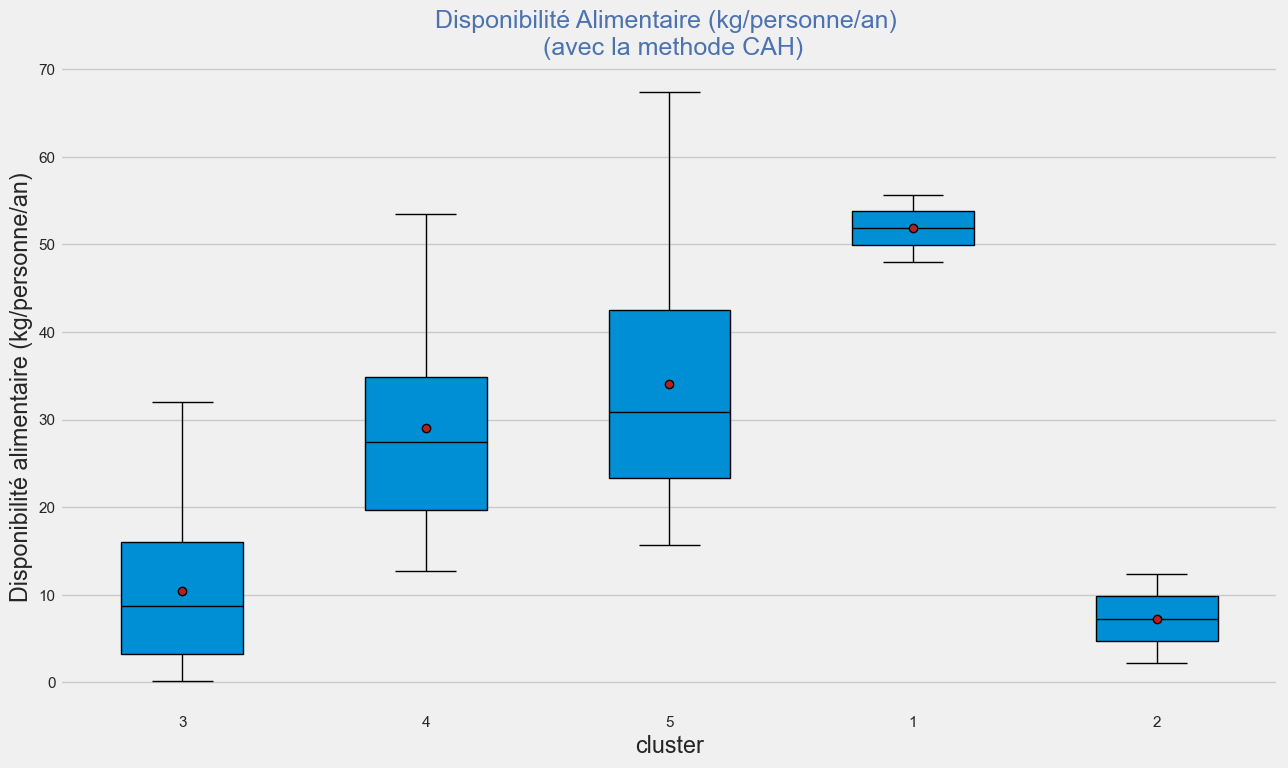

In [49]:
# Comparons les distributions de la variable "disponibilité alimentaire (kg/personne/an)"

C = "cluster"
V = "Disponibilité alimentaire en quantité (kg/personne/an)" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité Alimentaire (kg/personne/an) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité alimentaire (kg/personne/an)")
plt.savefig('boxplot', dpi=300, bbox_inches='tight') 
plt.show()

#### 2. Disponibilité intérieure (en milliers de tonnes)

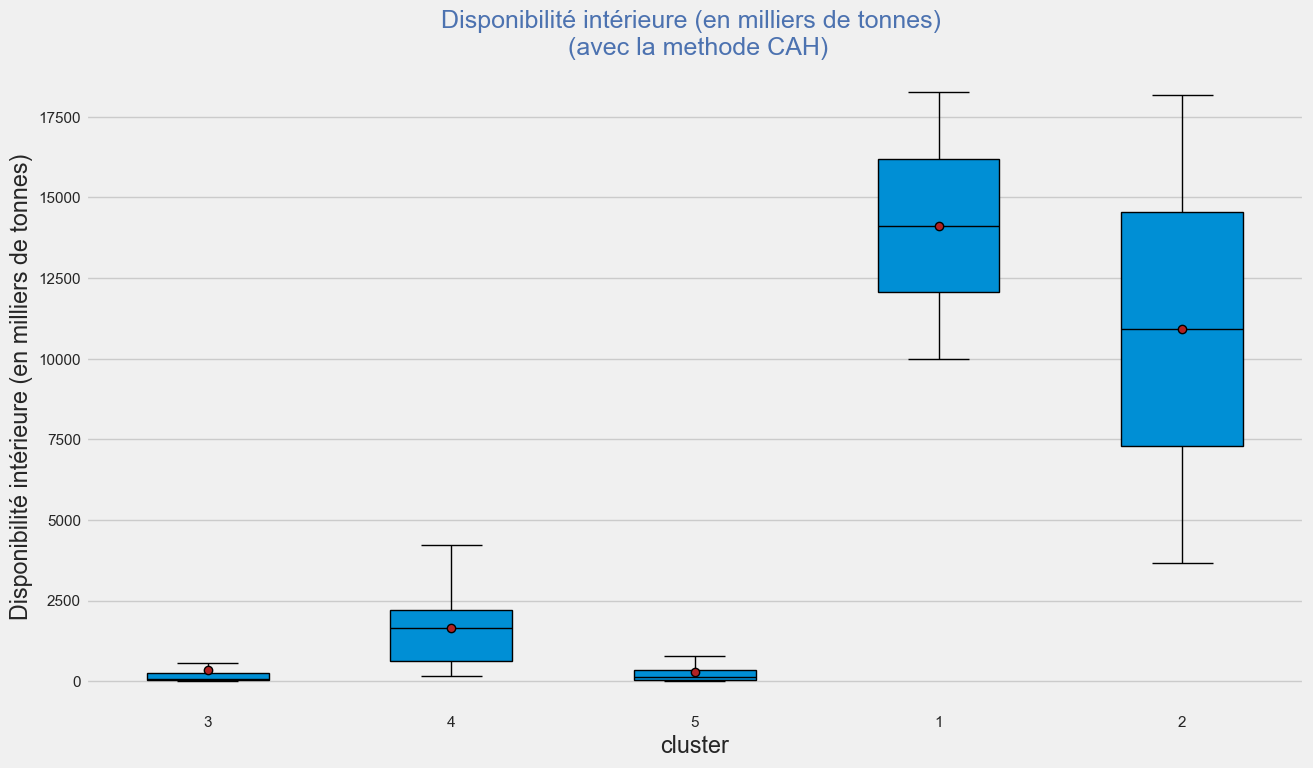

In [50]:
# Comparons les distributions de la variable "Disponibilité intérieure"

C = "cluster"
V = "Disponibilité intérieure" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité intérieure (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité intérieure (en milliers de tonnes)")
plt.show()

#### 3. Exportations (en milliers de tonnes)

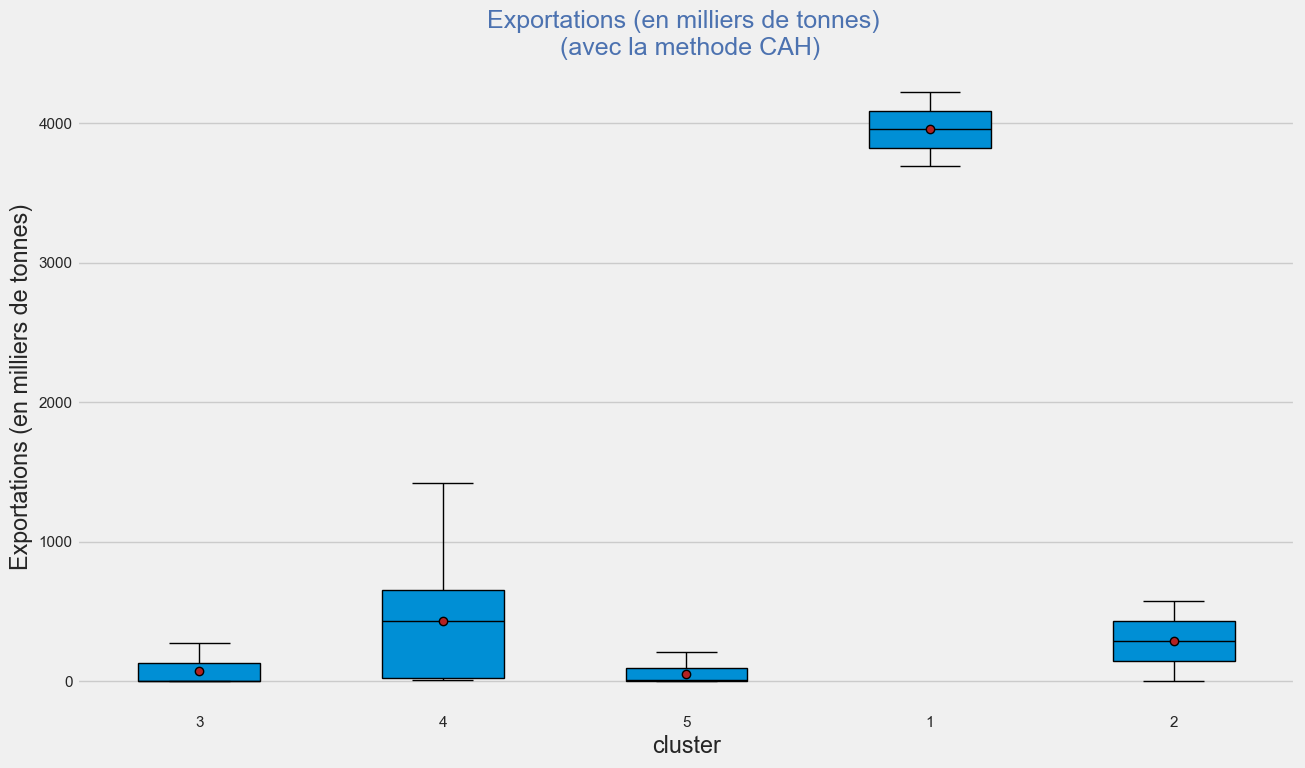

In [51]:
# Comparons les distributions de la variable "Exportations"

C = "cluster"
V = "Exportations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Exportations (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Exportations (en milliers de tonnes)")
plt.show()

#### 4. Importations (en milliers de tonnes)

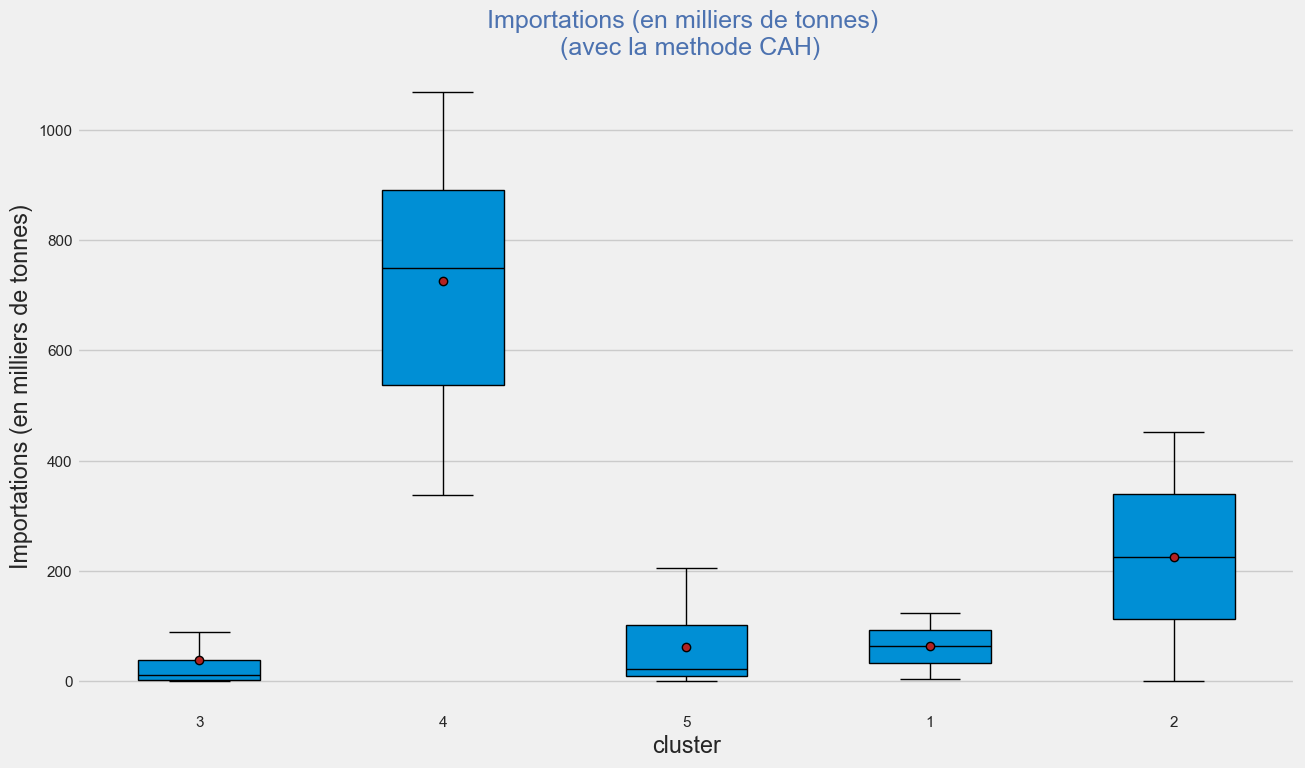

In [52]:
# Comparons les distributions de la variable "Importations"

C = "cluster"
V = "Importations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Importations (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Importations (en milliers de tonnes)")
plt.show()

#### 5. PIB_par_habitant (en dollars américain)

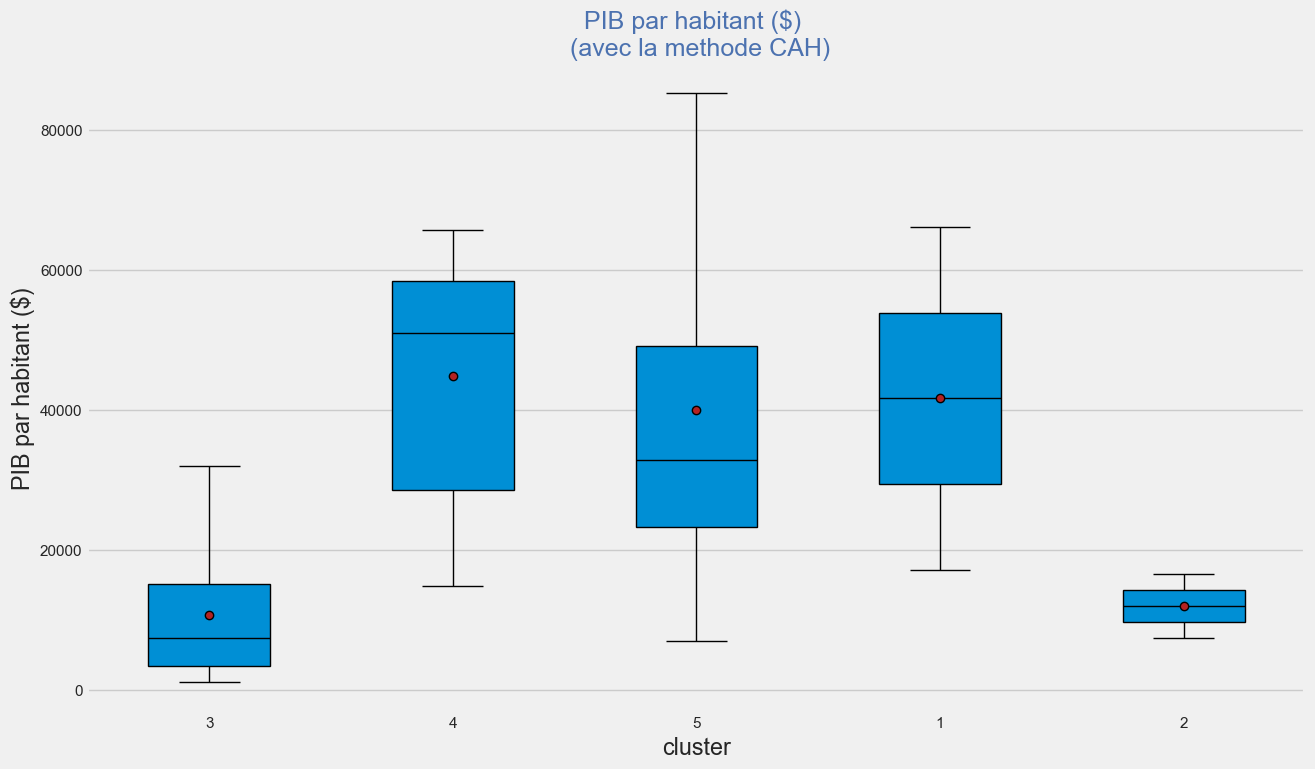

In [53]:
# Comparons les distributions de la variable "PIB_par_habitant"

C = "cluster"
V = "PIB_par_habitant" 

plt.figure(figsize = (14,8))
plt.title("PIB par habitant ($) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("PIB par habitant ($)")
plt.show()

#### 6. Production (en milliers de tonnes)

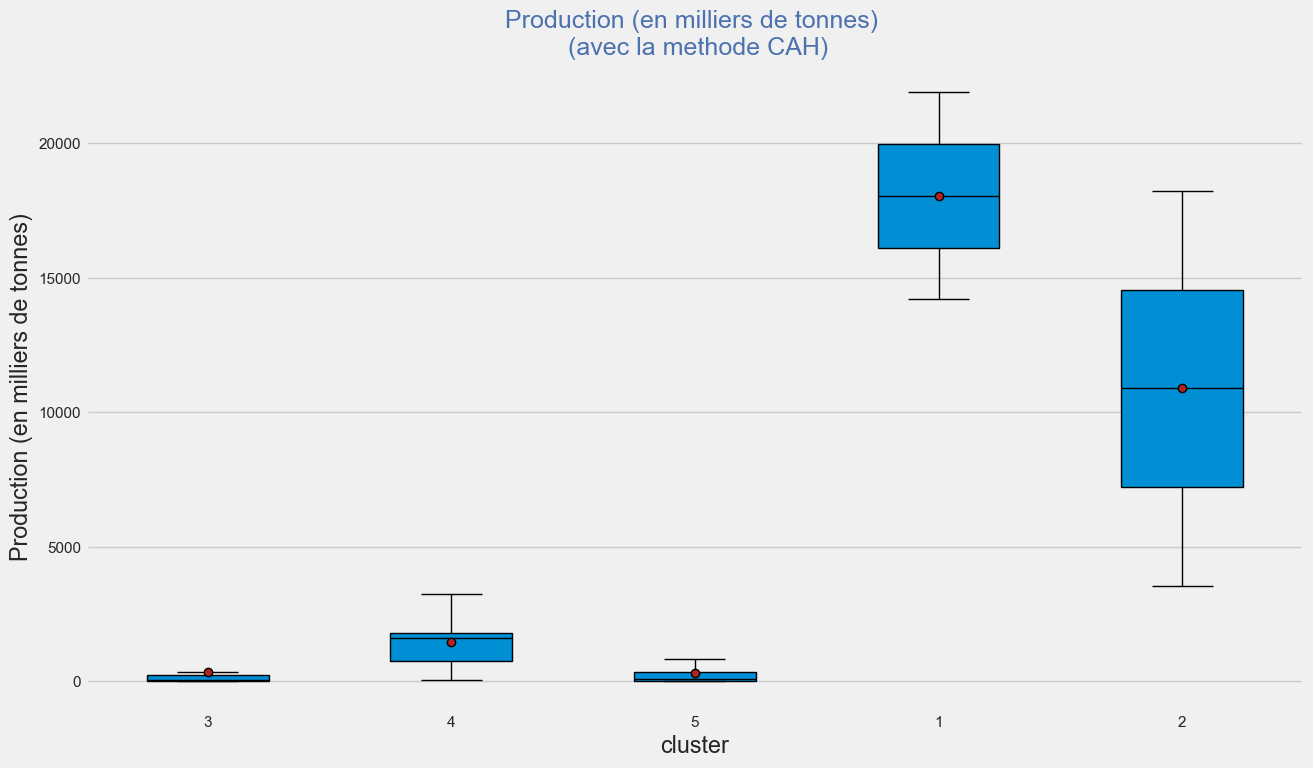

In [54]:
# Comparons les distributions de la variable "Production"

C = "cluster"
V = "Production" 

plt.figure(figsize = (14,8))
plt.title("Production (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Production (en milliers de tonnes)")
plt.show()

#### 7. Stabilité politique

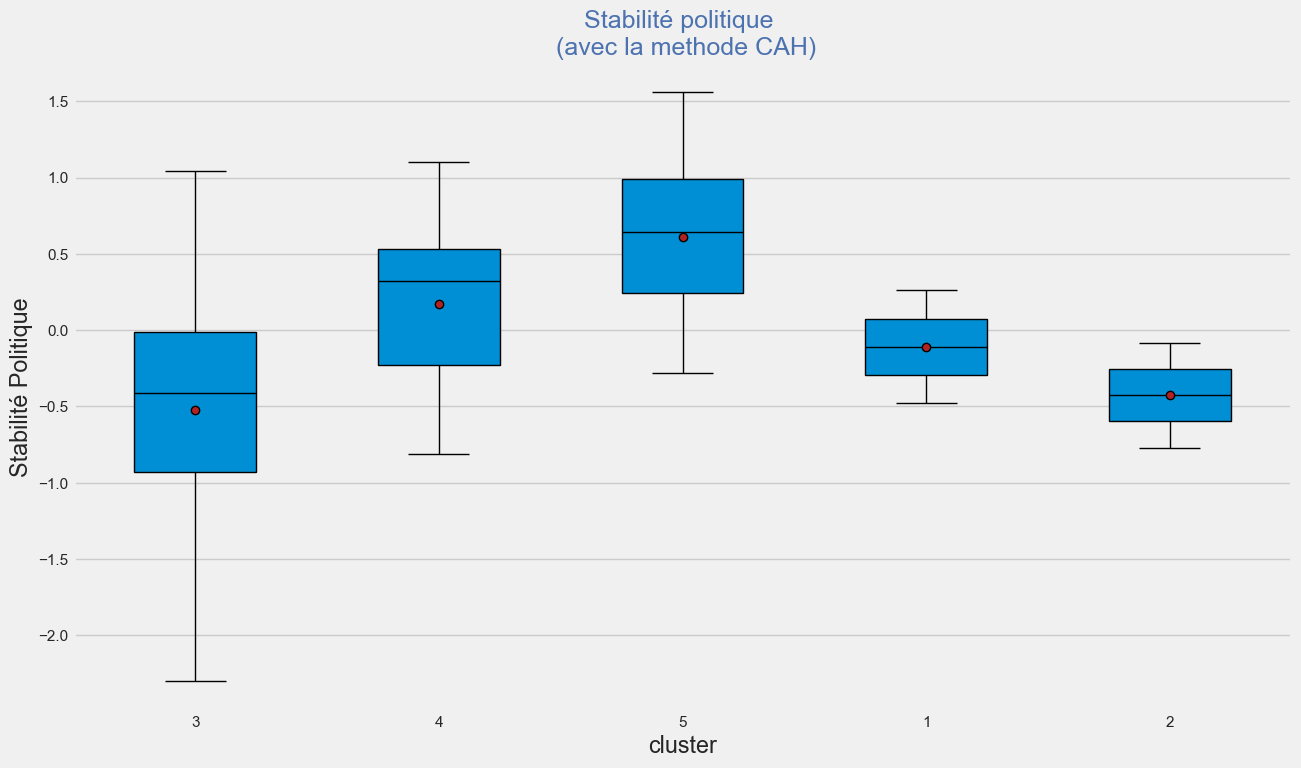

In [55]:
# Comparons les distributions de la variable "Stabilite_politique"

C = "cluster"
V = "Stabilite politique" 

plt.figure(figsize = (14,8))
plt.title("Stabilité politique \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Stabilité Politique")
plt.show()

#### 8. Population (en milliers d'habitants)

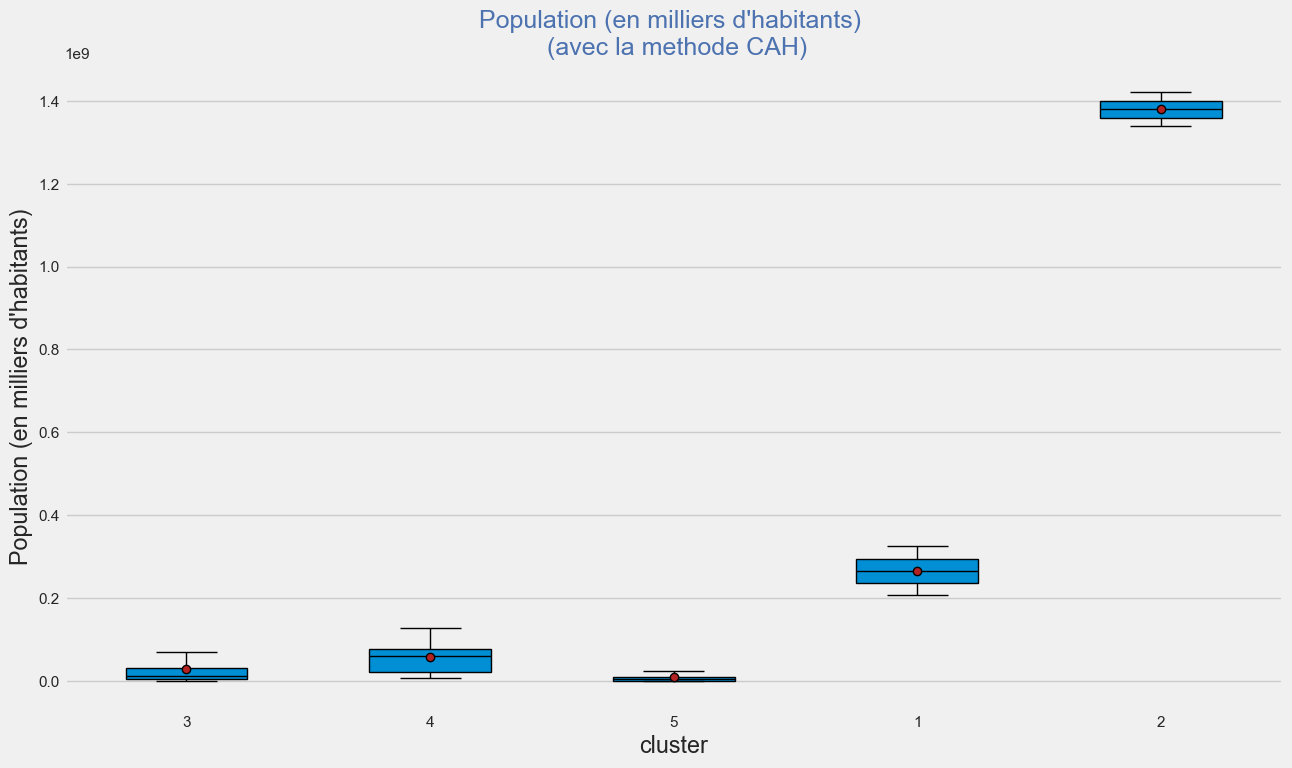

In [56]:
# Comparons les distributions de la variable "Population"

C = "cluster"
V = "Population" 

plt.figure(figsize = (14,8))
plt.title("Population (en milliers d'habitants) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering[La_poule_qui_chante_clustering[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Population (en milliers d'habitants)")
plt.show()

 Grâce à la classification ascendante hiérarchique, nous avons identifié des clusters pertinents (4 et 5) qui nous ont permis de sélectionner les premiers groupes de pays candidats, tels que le Japon, le Mexique, l'Arabie saoudite, l'Afrique du Sud, le Royaume-Uni, les Émirats arabes unis, la Chine (RAS Honk Kong, Taiwan, le Koweït, la République de Corée, la Suède, la Suisse, l'Autriche, les Bahamas et la Chine (RAS de Macao).

Nous allons maintenant appliquer la méthode de clustering k-means pour examiner si elle génère des résultats différents. Ces résultats seront comparés aux ceux obtenus par la classification ascendante hiérarchique, afin de déterminer la méthode la plus adaptée pour le choix final des pays pour notre stratégie d'exportation.


## ETAPE 4: Clustering avec k-means

### Objectif de l'analyse : 

L'objectif de cette analyse est de regrouper les observations similaires en différents clusters distincts. La méthode des k-means est une approche non supervisée permettant de partitionner un ensemble de données en *k* clusters, de manière à ce que les observations au sein de chaque cluster soient aussi similaires que possible, tout en étant distinctes des autres clusters.

### Fonctionnement :

1. **Définition du nombre de clusters** : On commence par déterminer le nombre de clusters souhaités.
2. **Initialisation des centroïdes** : On place aléatoirement *k* points appelés centroïdes dans l'espace des données.
3. **Affectation des points aux clusters** : Chaque point du jeu de données est alors affecté au centroïde le plus proche.
4. **Déplacement des centroïdes** : Les centroïdes sont ensuite déplacés vers le centre de leurs clusters respectifs.
5. **Répétition** : Ce processus est répété jusqu'à ce que les centroïdes convergent vers une position stable.

### Comment déterminer le bon nombre de clusters ?

Pour choisir le nombre optimal de clusters, on utilise la méthode du coude, accompagnée du coefficient de silhouette. La méthode du coude consiste à tracer un graphique représentant la somme des carrés des distances entre chaque point et son centroïde en fonction du nombre de clusters. Le nombre idéal de clusters est celui où l'ajout d'un cluster supplémentaire n'entraîne plus qu'une amélioration marginale de la somme des carrés des distances.


In [57]:
# Je retrouve mes données standardisées, auxquelles je réattribue l'index 'pays' et le nom des variables

La_poule_qui_chante_X_scaled = pd.DataFrame(X_scaled, index = pays, columns = ["Dispo alim (kg/personne/an)","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Production","population","PIB_par_habitant","Stabilite_politique"])
La_poule_qui_chante_X_scaled.head()

Dispo alim (kg/personne/an)  Disponibilité intérieure  \
Zone                                                                    
Afghanistan                       -1.181435                 -0.290861   
Afrique du Sud                     0.978658                  0.659773   
Albanie                           -0.243666                 -0.295473   
Algérie                           -0.874747                 -0.189386   
Allemagne                         -0.047007                  0.484960   

                Exportations - Quantité  Importations - Quantité  Production  \
Zone                                                                           
Afghanistan                    0.000000                -0.327124   -0.282855   
Afrique du Sud                -0.152561                 2.294003    0.382099   
Albanie                       -0.291483                -0.278485   -0.288941   
Algérie                       -0.291483                -0.473043   -0.182646   
Allemagne                      1.133020                 4.066642    0.320026   

                population  PIB_par_habitant  Stabilite_politique  
Zone                                                               
Afghanistan      -0.042889         -0.890003            -3.087433  
Afrique du Sud    0.092833         -0.367353            -0.225958  
Albanie          -0.261814         -0.393528             0.515061  
Algérie          -0.009518         -0.412198            -0.955577  
Allemagne         0.260891          1.691221             0.743067

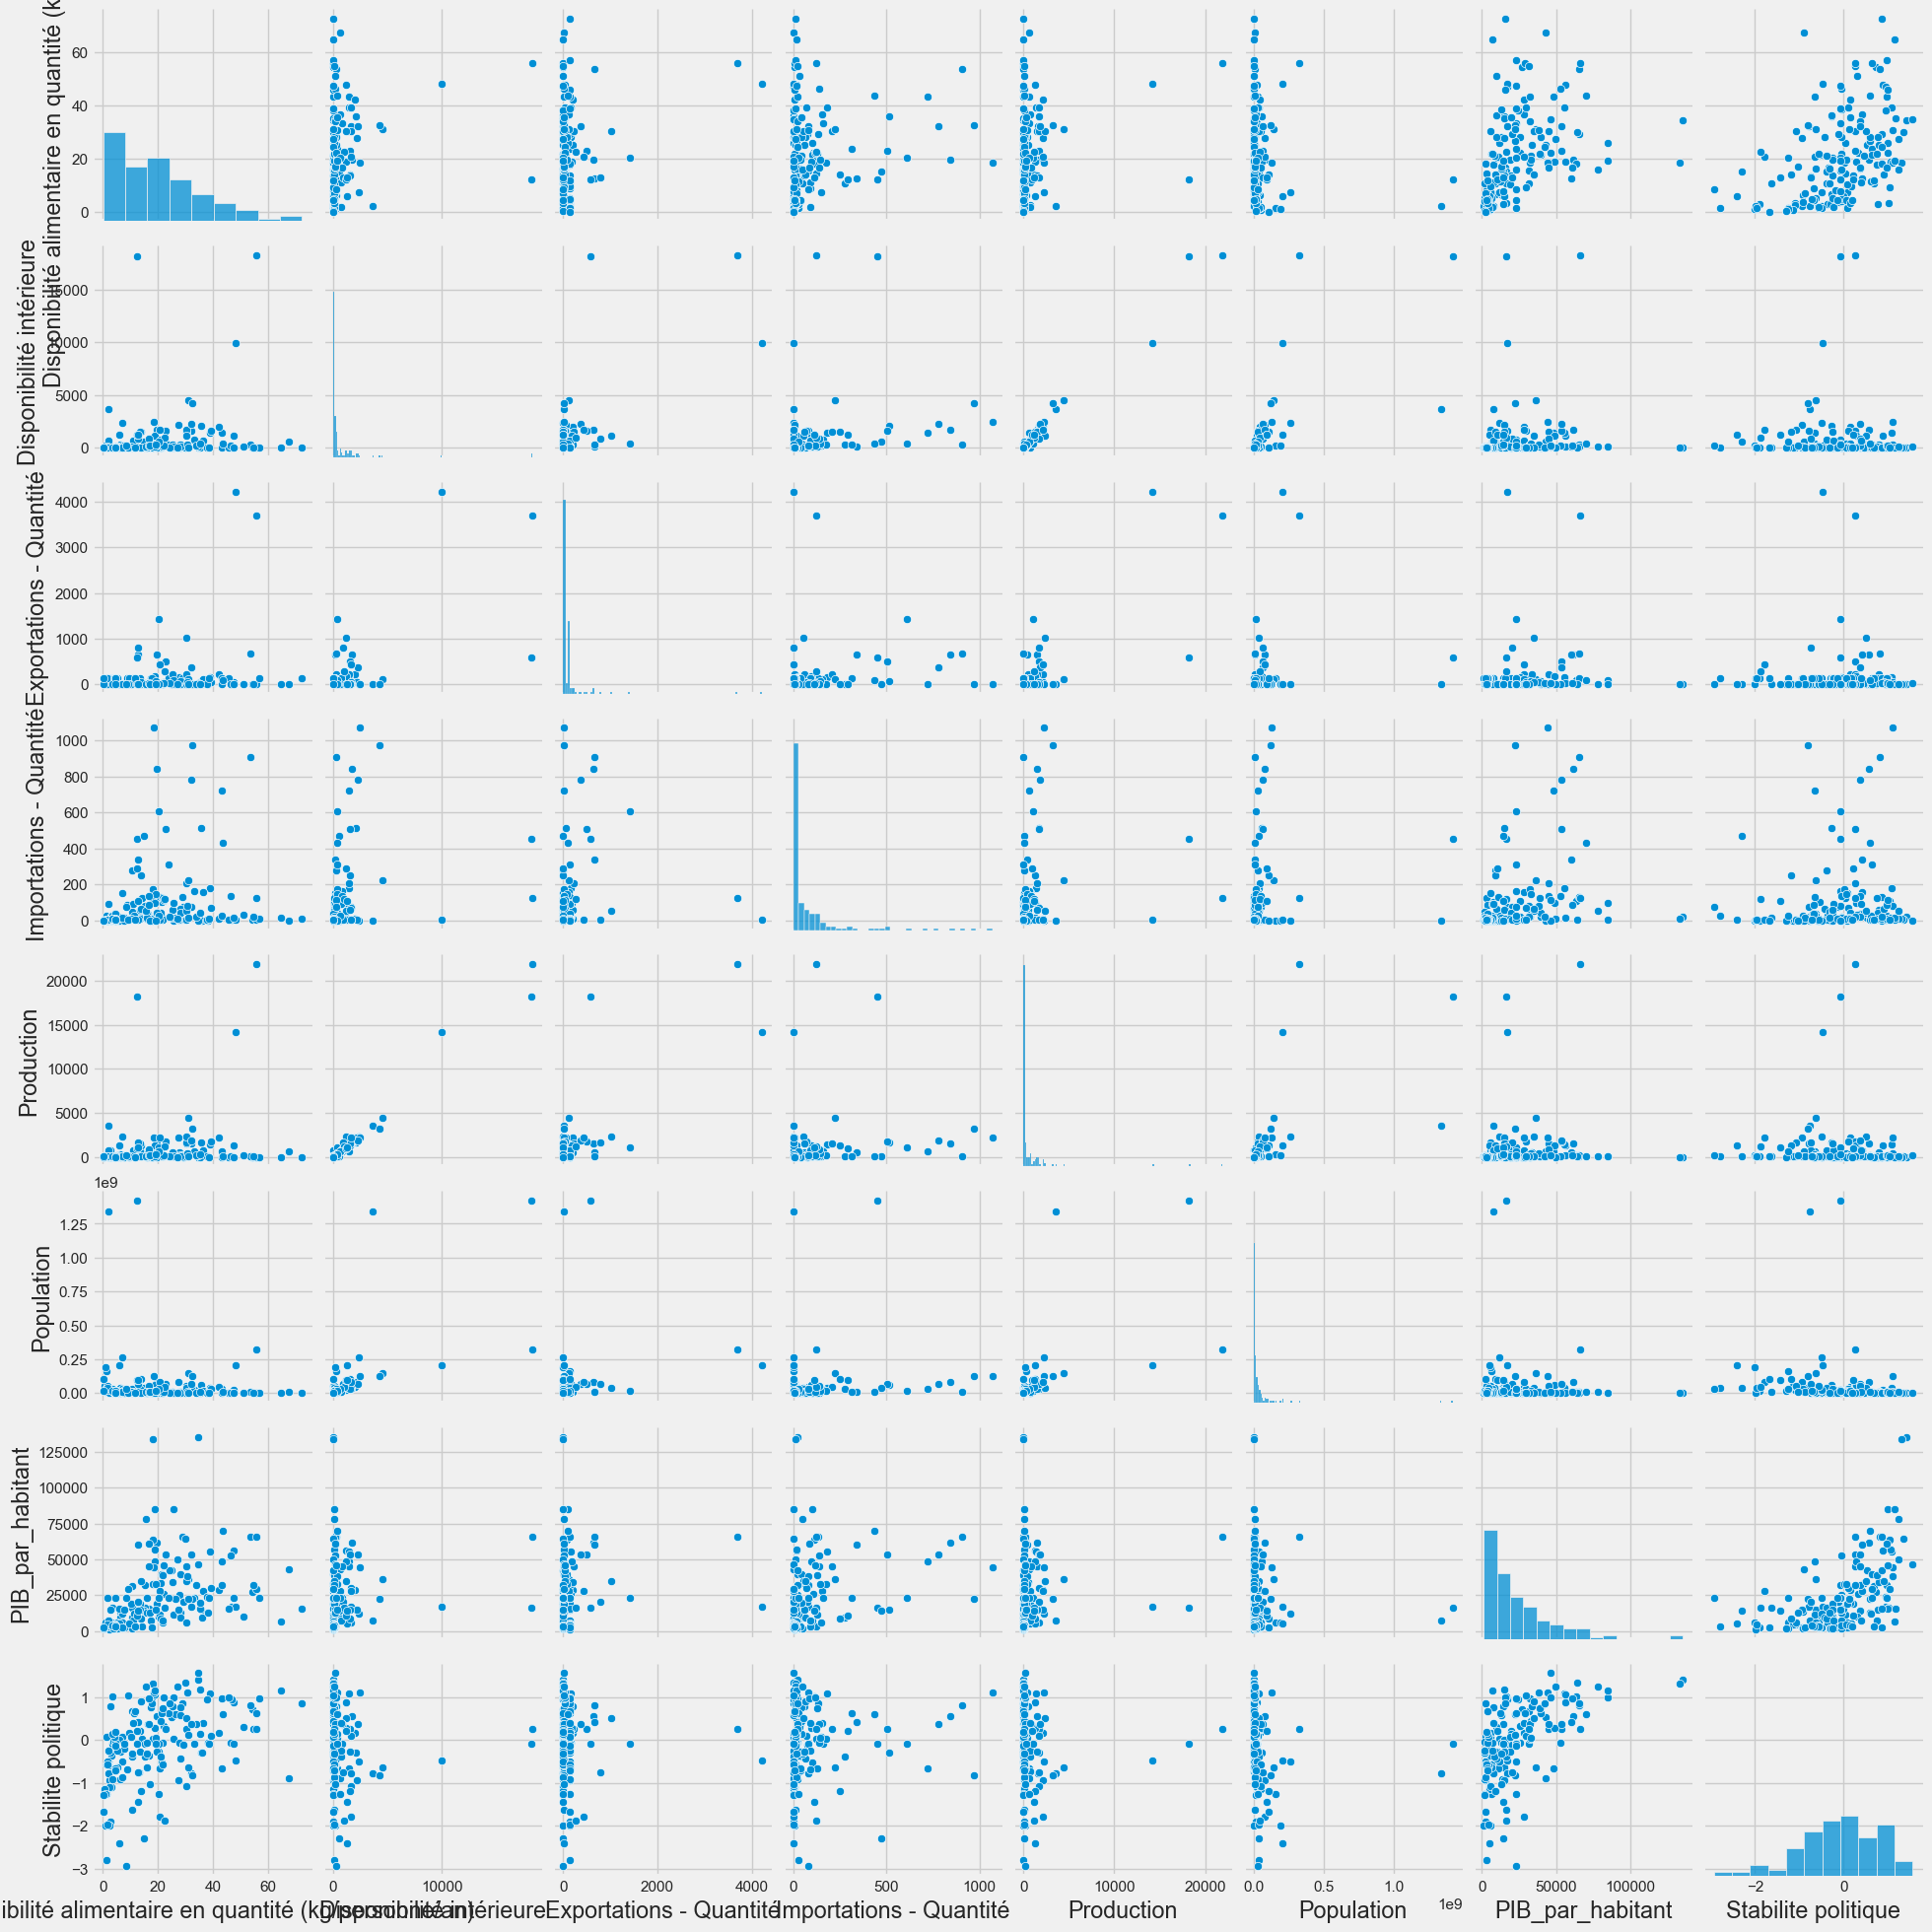

In [58]:
# Visuellement, on peut voir les variables qui sont liées entre elles sur mon dataframe original (les graphiques seront
# identiques avec les données centrées réduites, ce sont juste les mesures qui changeront)

sns.pairplot(La_poule_qui_chante)
plt.show()

>On remarque par exemple, que plus la production augmente, plus la disponibilité intérieure augmente.

>Egalement, plus le PIB par habitant augmente, plus la stabilité politique est bonne donc on peut en déduire qu'il y a une meilleure stabilité politique dans les pays riches. 

>Egalement, plus la stabilité politique est bonne, plus la disponibilité alimentaire est élevée (car plus le PIB est élevé aussi)

In [59]:
# On instancie notre Kmeans avec 5 clusters : 
kmeans = KMeans(n_clusters=5)

# On l'entraine : 
kmeans.fit(La_poule_qui_chante_X_scaled)

KMeans(n_clusters=5)

In [60]:
# Calcul de son inertie

round(kmeans.inertia_,2)

427.64

In [61]:
# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

array([0, 3, 0, 0, 3, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 3, 2, 2, 4, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       4, 0, 0, 0, 2, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 3, 0, 2, 2, 2, 0, 2, 3, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0])

In [62]:
# Effectifs par cluster

np.unique(kmeans.labels_,return_counts = True)

(array([0, 1, 2, 3, 4]), array([94,  2, 65,  9,  2], dtype=int64))

In [63]:
# Je rajoute la variable contenant le numéro de cluster au dataframe original

La_poule_qui_chante_clustering_Kmeans = La_poule_qui_chante.copy()
La_poule_qui_chante_clustering_Kmeans['cluster'] = kmeans.labels_
La_poule_qui_chante_clustering_Kmeans = La_poule_qui_chante_clustering_Kmeans.set_index('Zone')
La_poule_qui_chante_clustering_Kmeans.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                         57.0               132.185185   
Afrique du Sud                    2118.0                63.000000   
Albanie                             47.0                 0.000000   
Algérie                            277.0                 0.000000   
Allemagne                         1739.0               646.000000   

                Importations - Quantité  Production  Population  \
Zone                                                              
Afghanistan                        29.0        28.0  36296113.0   
Afrique du Sud                    514.0      1667.0  57009756.0   
Albanie                            38.0        13.0   2884169.0   
Algérie                             2.0       275.0  41389189.0   
Allemagne                         842.0      1514.0  82658409.0   

                PIB_par_habitant  Stabilite politique  cluster  
Zone                                                            
Afghanistan               2956.8                -2.79        0  
Afrique du Sud           14823.6                -0.28        3  
Albanie                  14229.3                 0.37        0  
Algérie                  13805.4                -0.92        0  
Allemagne                61563.6                 0.57        3

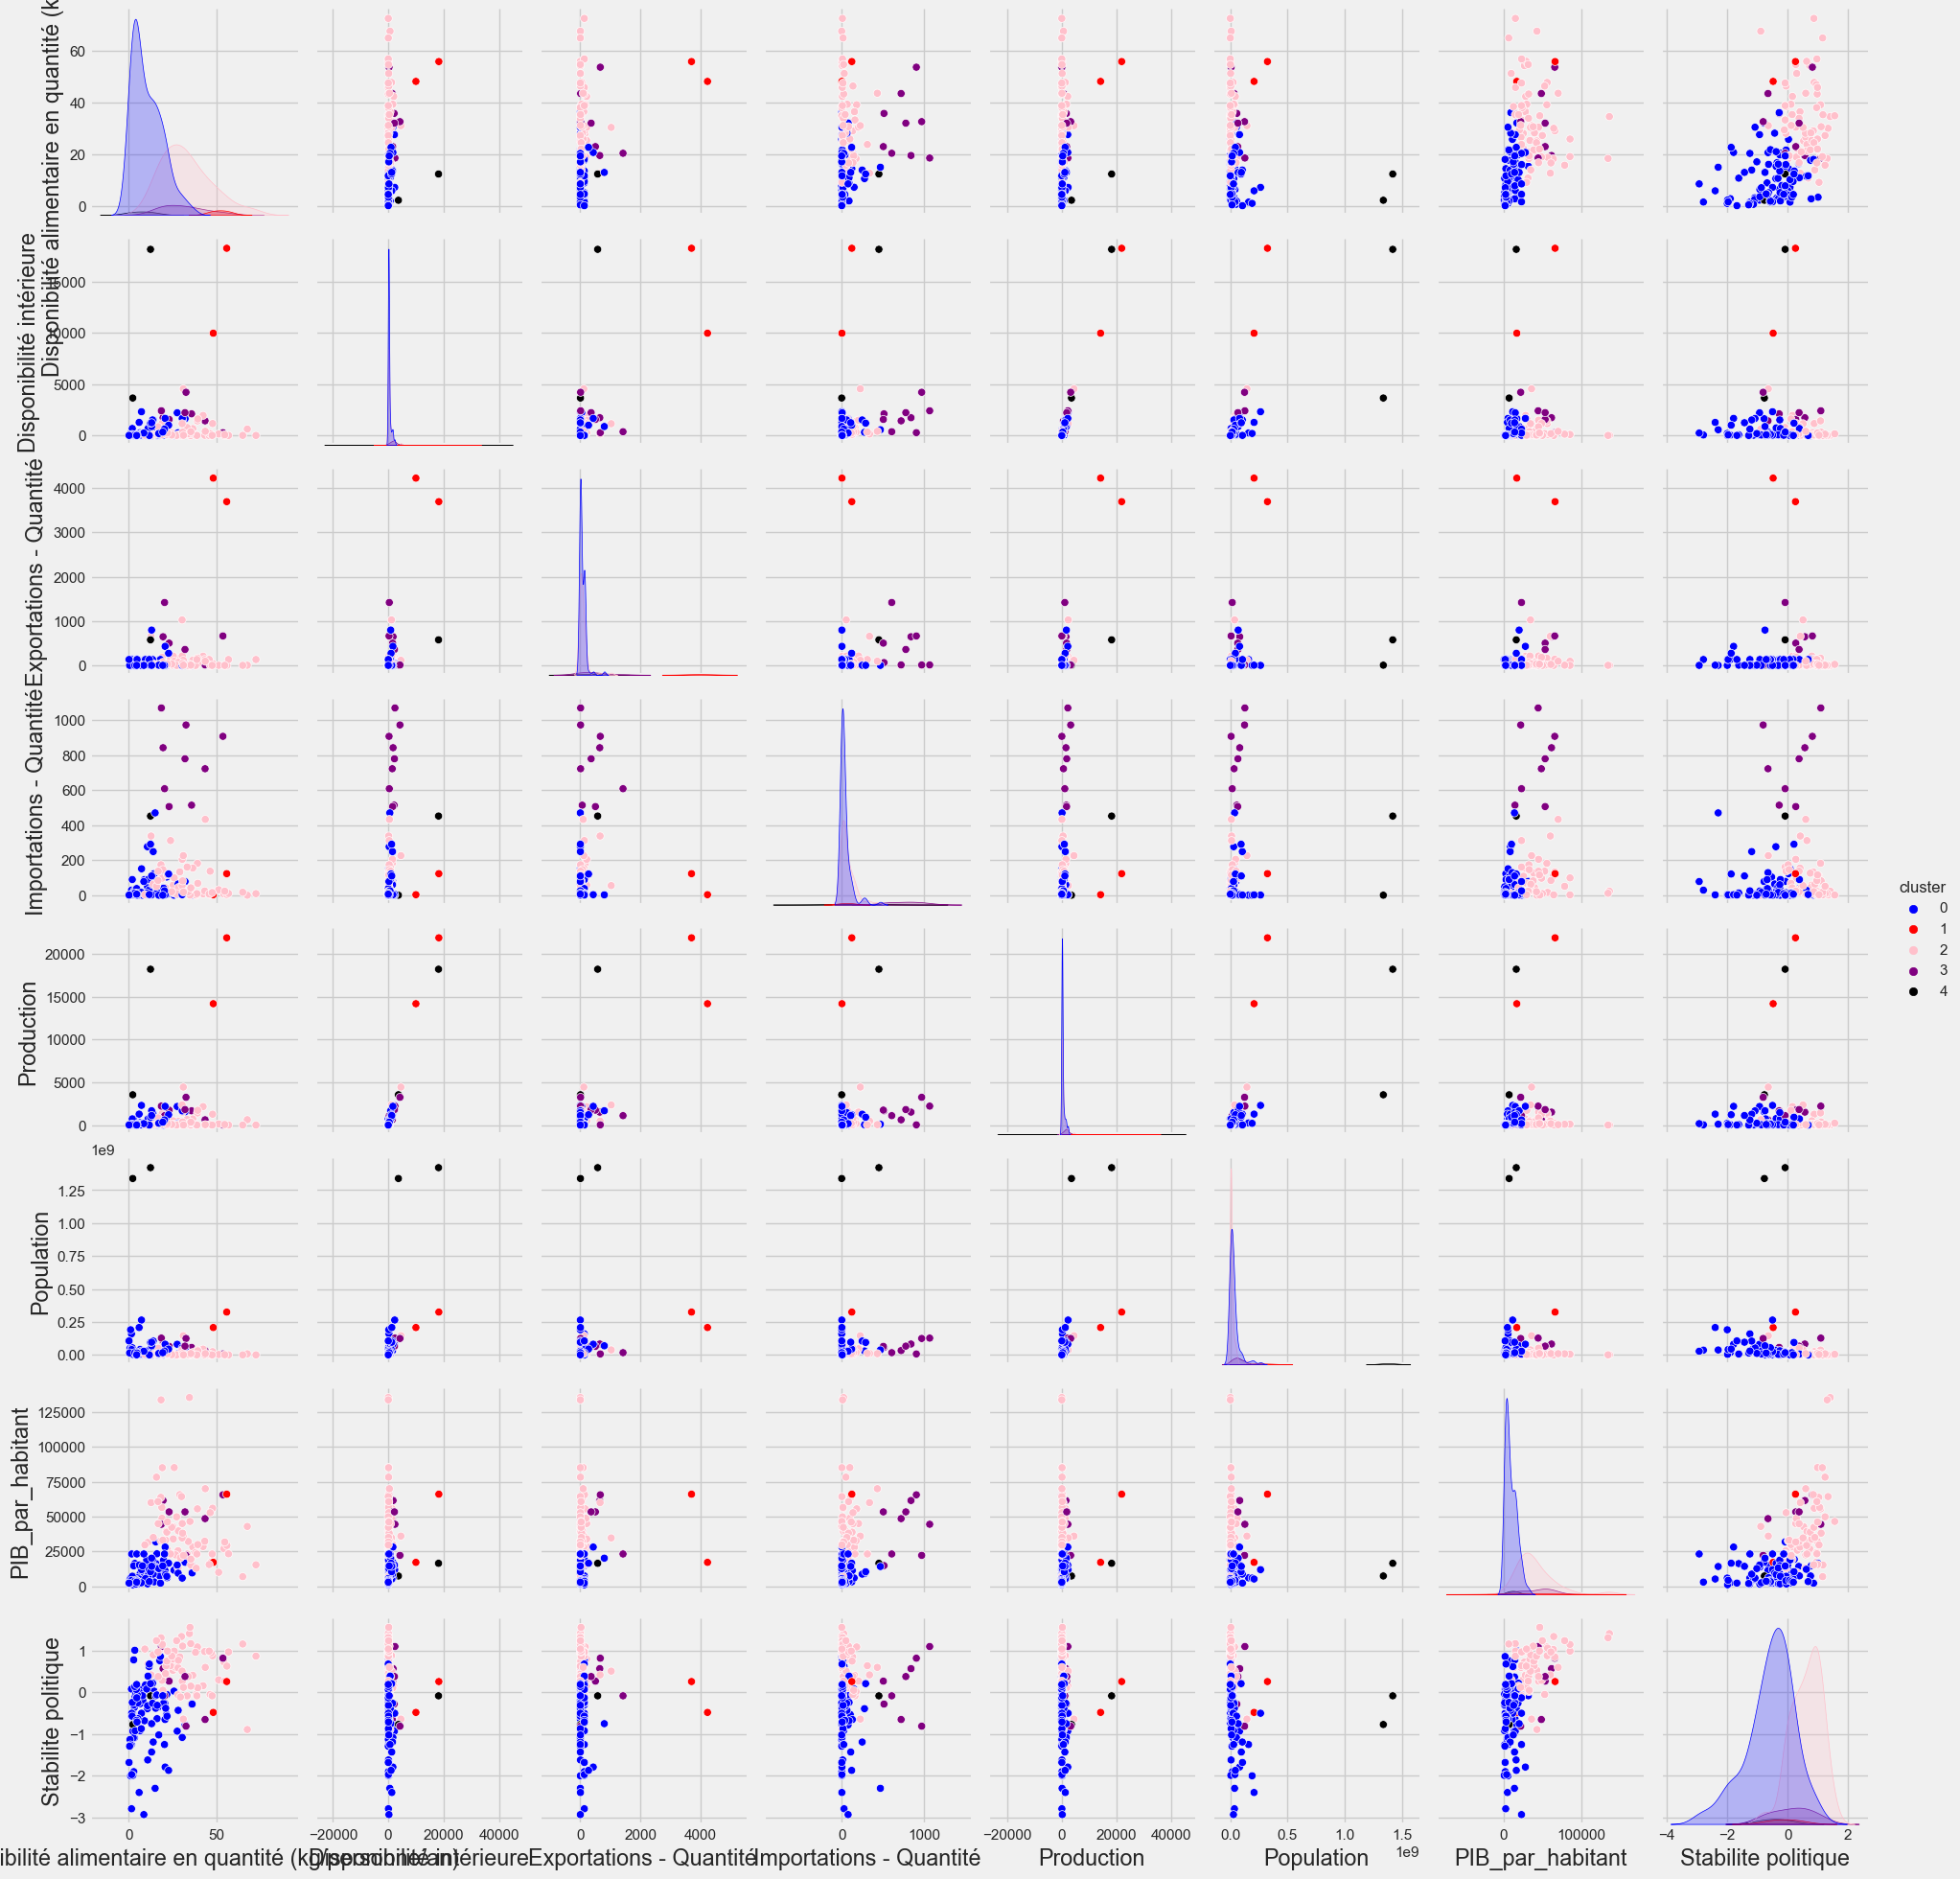

In [64]:
# Voyons ce que cela donne au niveau graphique ; on reprend les mêmes données et on colorie par cluster.
# Configuration des points dans le plan par paires de variables

sns.pairplot(La_poule_qui_chante_clustering_Kmeans, hue = 'cluster', palette = {0:'blue',1:'red',2:'pink',3:'purple',4:'black'})
plt.show()

In [65]:
# J'affiche les moyennes par cluster afin d'avoir une première idée des groupes

La_poule_qui_chante_clustering_Kmeans_moyenne = La_poule_qui_chante_clustering_Kmeans.pivot_table(index = 'cluster', aggfunc = 'mean').round(2)
La_poule_qui_chante_clustering_Kmeans_moyenne

Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster                                                           
0                                                    10.28        
1                                                    51.86        
2                                                    32.51        
3                                                    30.91        
4                                                     7.28        

         Disponibilité intérieure  Exportations - Quantité  \
cluster                                                      
0                          300.32                    61.18   
1                        14124.00                  3957.50   
2                          362.78                    74.02   
3                         1820.56                   408.78   
4                        10911.00                   290.00   

         Importations - Quantité  PIB_par_habitant    Population  Production  \
cluster                                                                        
0                          36.47           9360.75  2.905945e+07      303.47   
1                          63.00          41625.50  2.664593e+08    18057.50   
2                          68.83          40154.84  1.174814e+07      374.80   
3                         768.78          43024.36  6.454967e+07     1549.89   
4                         226.00          11912.45  1.379849e+09    10890.50   

         Stabilite politique  
cluster                       
0                      -0.57  
1                      -0.11  
2                       0.61  
3                       0.15  
4                      -0.43

### Méthode du coude

In [66]:
inertia = []

In [67]:
k_list = range(1, 6)
list(k_list)

[1, 2, 3, 4, 5]

In [68]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled) 
  inertia.append(kmeans.inertia_)

In [69]:
inertia

[1376.0,
 919.7184619681882,
 671.9350375320051,
 545.7797382791065,
 427.6422532130794]

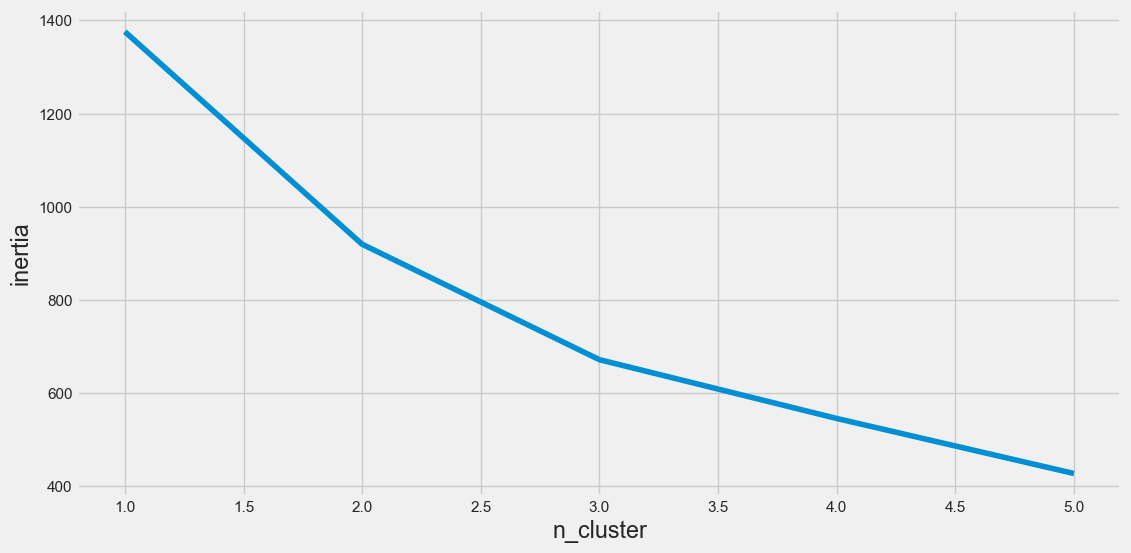

In [70]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
plt.style.use("fivethirtyeight")
ax = plt.plot(k_list, inertia)
plt.savefig('methode du coude', dpi=300, bbox_inches='tight') 
plt.show()

>La méthode du coude nous indique un partitionnement en 3 clusters

### Silhouette Score

In [71]:
# Silhouette Score

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, kmeans.labels_))

Silhouette Coefficient: 0.366


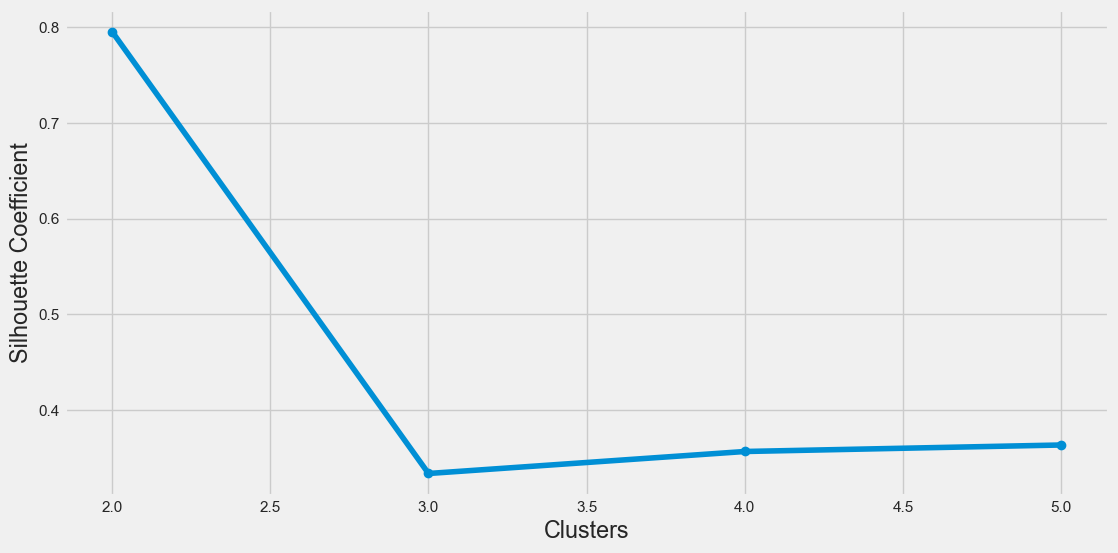

In [72]:
# Version graphique du silhouette score

X_norm = preprocessing.scale(X)

Silhouettes = []
for num_clusters in range (2, 6) :
    cls = cluster.KMeans(n_clusters = num_clusters,
                        n_init = 10, init = 'k-means++', random_state=42, max_iter = 300)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    Silhouettes.append(silh)
    
fig, ax = plt.subplots(1,1,figsize=(12,6))    
    
plt.plot(range (2, 6), Silhouettes,marker = 'o')
plt.style.use("fivethirtyeight")
plt.ylabel('Silhouette Coefficient')
plt.xlabel('Clusters')
plt.savefig('Silhouette Coefficient', dpi=300, bbox_inches='tight') 
plt.show()

Le silhouette score nous donne un partitionnement en 3 clusters. Toutefois, étant donné qe je souhaite un partitionnement plus fin, je vais plutôt tester avec 5 clusters.

In [73]:
# Essayons le KMeans avec 5 clusters

kmeans = KMeans(n_clusters=5)
kmeans.fit(La_poule_qui_chante_X_scaled)

KMeans(n_clusters=5)

In [74]:
# On peut stocker nos clusters dans une variable labels : 

labels = kmeans.labels_
labels

array([0, 4, 0, 0, 4, 0, 2, 4, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 4, 2, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 4, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       3, 0, 0, 0, 2, 2, 2, 2, 2, 4, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 4, 0, 2, 2, 2, 0, 2, 4, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0])

In [75]:
# Effectifs par groupe

np.unique(kmeans.labels_,return_counts = True)

(array([0, 1, 2, 3, 4]), array([94,  2, 65,  2,  9], dtype=int64))

In [76]:
# Je rajoute la variable contenant le numéro de groupe au dataframe original

La_poule_qui_chante_clustering_Kmeans_bis = La_poule_qui_chante.copy()
La_poule_qui_chante_clustering_Kmeans_bis['cluster'] = kmeans.labels_
La_poule_qui_chante_clustering_Kmeans_bis = La_poule_qui_chante_clustering_Kmeans_bis.set_index('Zone')
La_poule_qui_chante_clustering_Kmeans_bis.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                         57.0               132.185185   
Afrique du Sud                    2118.0                63.000000   
Albanie                             47.0                 0.000000   
Algérie                            277.0                 0.000000   
Allemagne                         1739.0               646.000000   

                Importations - Quantité  Production  Population  \
Zone                                                              
Afghanistan                        29.0        28.0  36296113.0   
Afrique du Sud                    514.0      1667.0  57009756.0   
Albanie                            38.0        13.0   2884169.0   
Algérie                             2.0       275.0  41389189.0   
Allemagne                         842.0      1514.0  82658409.0   

                PIB_par_habitant  Stabilite politique  cluster  
Zone                                                            
Afghanistan               2956.8                -2.79        0  
Afrique du Sud           14823.6                -0.28        4  
Albanie                  14229.3                 0.37        0  
Algérie                  13805.4                -0.92        0  
Allemagne                61563.6                 0.57        4

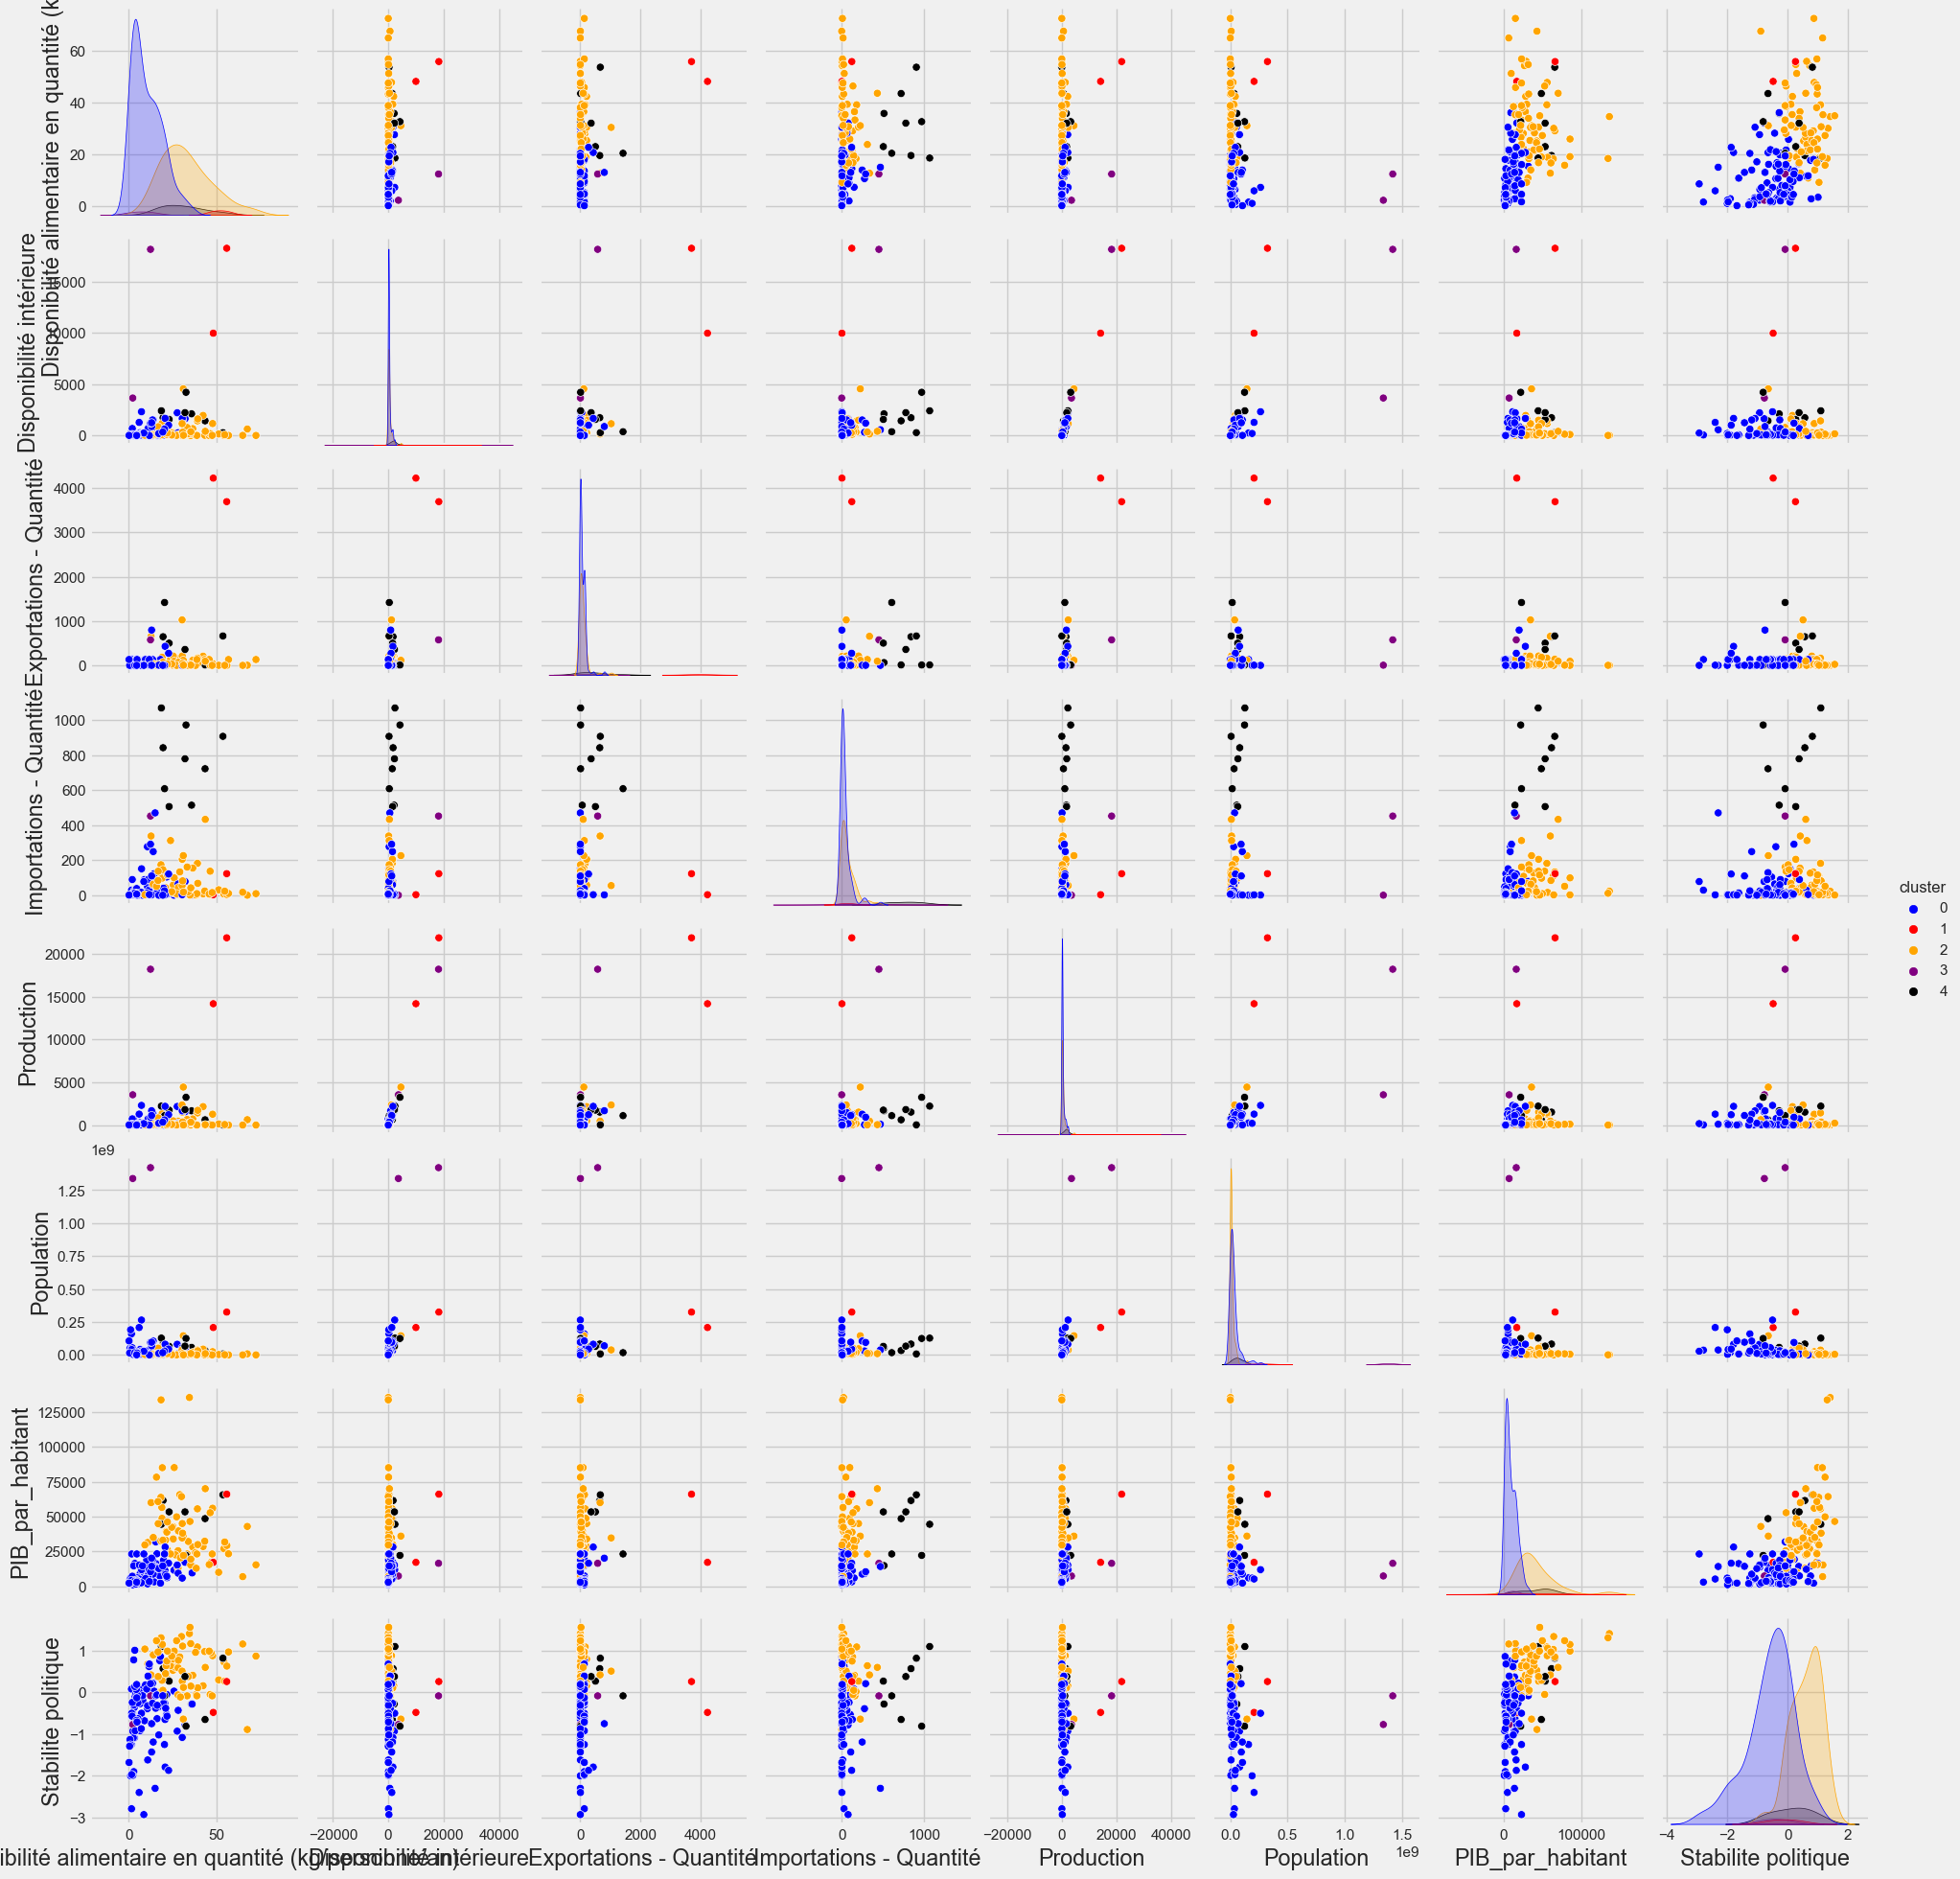

In [77]:
# Configuration des points dans le plan par paires de variables

sns.pairplot(La_poule_qui_chante_clustering_Kmeans_bis, hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'black'})
plt.savefig('nuage de point', dpi=300, bbox_inches='tight') 
plt.show()

#### Voici les clusters que nous obtenons avec la méthode des K-Means

In [78]:
# J'affiche uniquement le pays et son cluster

La_poule_qui_chante_clustering_Kmeans_ter = La_poule_qui_chante_clustering_Kmeans_bis.reset_index()
La_poule_qui_chante_clustering_Kmeans_ter = La_poule_qui_chante_clustering_Kmeans_ter.loc[:,['Zone','cluster']]
La_poule_qui_chante_clustering_Kmeans_ter.head()

Zone  cluster
0     Afghanistan        0
1  Afrique du Sud        4
2         Albanie        0
3         Algérie        0
4       Allemagne        4

In [79]:
# J'affiche mes clusters

for i in range(0, 5) : 
    # on fait une selection
    sub_La_poule_qui_chante_clustering_Kmeans_ter = La_poule_qui_chante_clustering_Kmeans_ter.loc[La_poule_qui_chante_clustering_Kmeans_ter.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les pays de chaque ligne
    pays_list =  sub_La_poule_qui_chante_clustering_Kmeans_ter.Zone.values
   
    # on créé une liste de couple nom/theme
    ziped = zip(pays_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")
    

cluster : 0
('Afghanistan',) / ('Albanie',) / ('Algérie',) / ('Angola',) / ('Arménie',) / ('Azerbaïdjan',) / ('Bangladesh',) / ('Belize',) / ('Bolivie (État plurinational de)',) / ('Bosnie-Herzégovine',) / ('Botswana',) / ('Burkina Faso',) / ('Bénin',) / ('Cabo Verde',) / ('Cambodge',) / ('Cameroun',) / ('Colombie',) / ('Congo',) / ("Côte d'Ivoire",) / ('Djibouti',) / ('El Salvador',) / ('Eswatini',) / ('Gambie',) / ('Ghana',) / ('Grèce',) / ('Guatemala',) / ('Guinée',) / ('Guinée-Bissau',) / ('Géorgie',) / ('Haïti',) / ('Honduras',) / ('Indonésie',) / ("Iran (République islamique d')",) / ('Iraq',) / ('Jordanie',) / ('Kenya',) / ('Kirghizistan',) / ('Kiribati',) / ('Lesotho',) / ('Liban',) / ('Libéria',) / ('Macédoine du Nord',) / ('Madagascar',) / ('Malawi',) / ('Maldives',) / ('Mali',) / ('Maroc',) / ('Mauritanie',) / ('Mongolie',) / ('Monténégro',) / ('Mozambique',) / ('Myanmar',) / ('Namibie',) / ('Nicaragua',) / ('Niger',) / ('Nigéria',) / ('Népal',) / ('Ouganda',) / ('Ouzbékista

In [80]:
# J'affiche les moyennes par cluster

La_poule_qui_chante_clustering_Kmeans_bis_moyenne = La_poule_qui_chante_clustering_Kmeans_bis.pivot_table(index = 'cluster', aggfunc = 'mean').round(2)
La_poule_qui_chante_clustering_Kmeans_bis_moyenne

Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster                                                           
0                                                    10.28        
1                                                    51.86        
2                                                    32.51        
3                                                     7.28        
4                                                    30.91        

         Disponibilité intérieure  Exportations - Quantité  \
cluster                                                      
0                          300.32                    61.18   
1                        14124.00                  3957.50   
2                          362.78                    74.02   
3                        10911.00                   290.00   
4                         1820.56                   408.78   

         Importations - Quantité  PIB_par_habitant    Population  Production  \
cluster                                                                        
0                          36.47           9360.75  2.905945e+07      303.47   
1                          63.00          41625.50  2.664593e+08    18057.50   
2                          68.83          40154.84  1.174814e+07      374.80   
3                         226.00          11912.45  1.379849e+09    10890.50   
4                         768.78          43024.36  6.454967e+07     1549.89   

         Stabilite politique  
cluster                       
0                      -0.57  
1                      -0.11  
2                       0.61  
3                      -0.43  
4                       0.15

### Nous retrouvons des clusters proches de ceux résultant de la CAH

>Le cluster 0 contenant des pays très pauvres, mauvaise stabilité politique, consomment peu de poulet. On retrouve les memes clusters que ceux du CAH.

>Le cluster 4 contenant des pays très riches, peu producteurs, assez peuplés, ayant une stabilité politique correcte et surtout qui importe beaucoup => C'est le cluster qui nous interesse. 

>Le cluster 3 contenant des pays très peuplés et relativement pauvres (de grosses inégalités économiques), de gros producteurs et consomment peu de poulet (Chine et Inde).

>Le cluster 2 contenant des pays riches, ayant une stabilité politique correcte, produisent très peu, exportent et importent peu de la viande de poulet. Ca peu nous interesser, mais il y aura de la concurrence et la plupart sont des iles et des petits pays très lointaines à comparer aux critères pestel. 

>Le cluster 1 contenant des pays producteurs et exportateurs, gros consommateurs de poulets (Brésil, USA). 


#### Regardons maintenant comment sont représentées les variables au sein de chaque cluster

#### 1. Disponibilité alimentaire (en kg/personne/an)

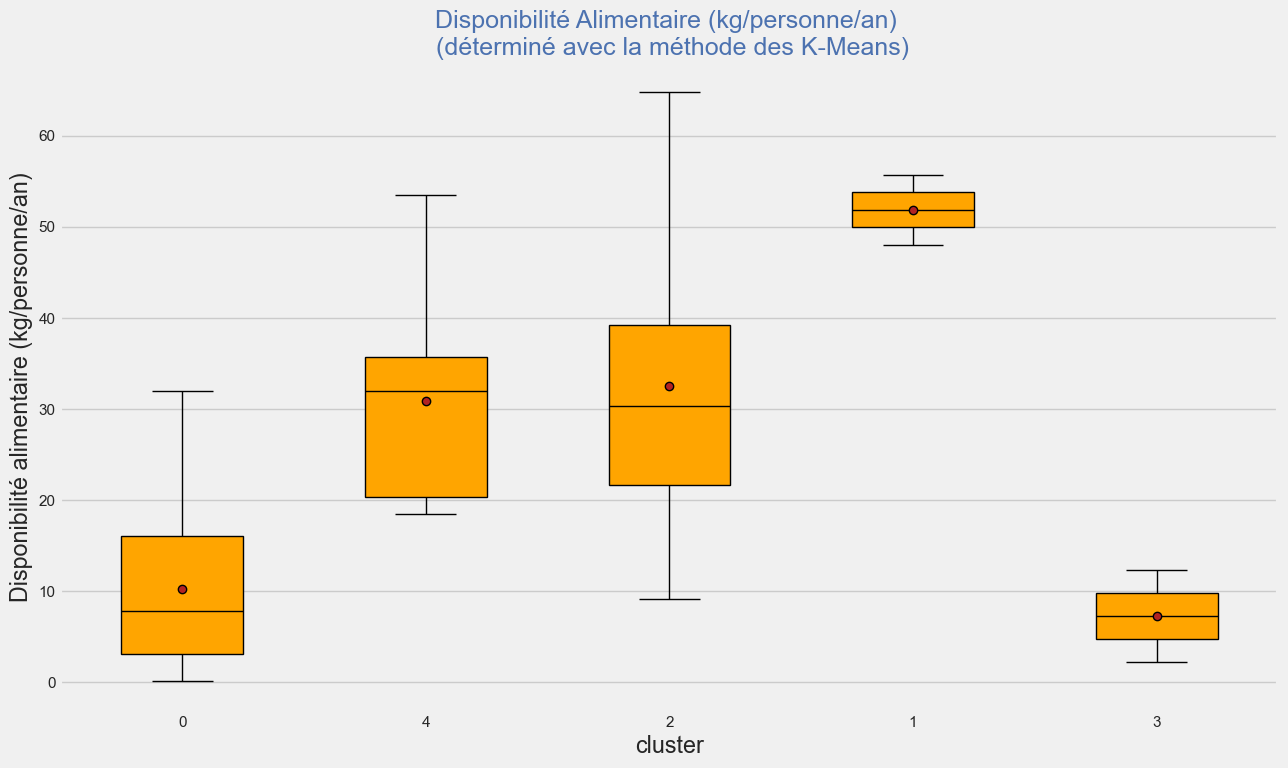

In [81]:
# Comparons les distributions de la variable "disponibilité alimentaire (kg/personne/an)"

C = "cluster"
V = "Disponibilité alimentaire en quantité (kg/personne/an)" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité Alimentaire (kg/personne/an) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité alimentaire (kg/personne/an)")
plt.show()

#### 2. Disponibilité inétrieure (en milliers de tonnes)

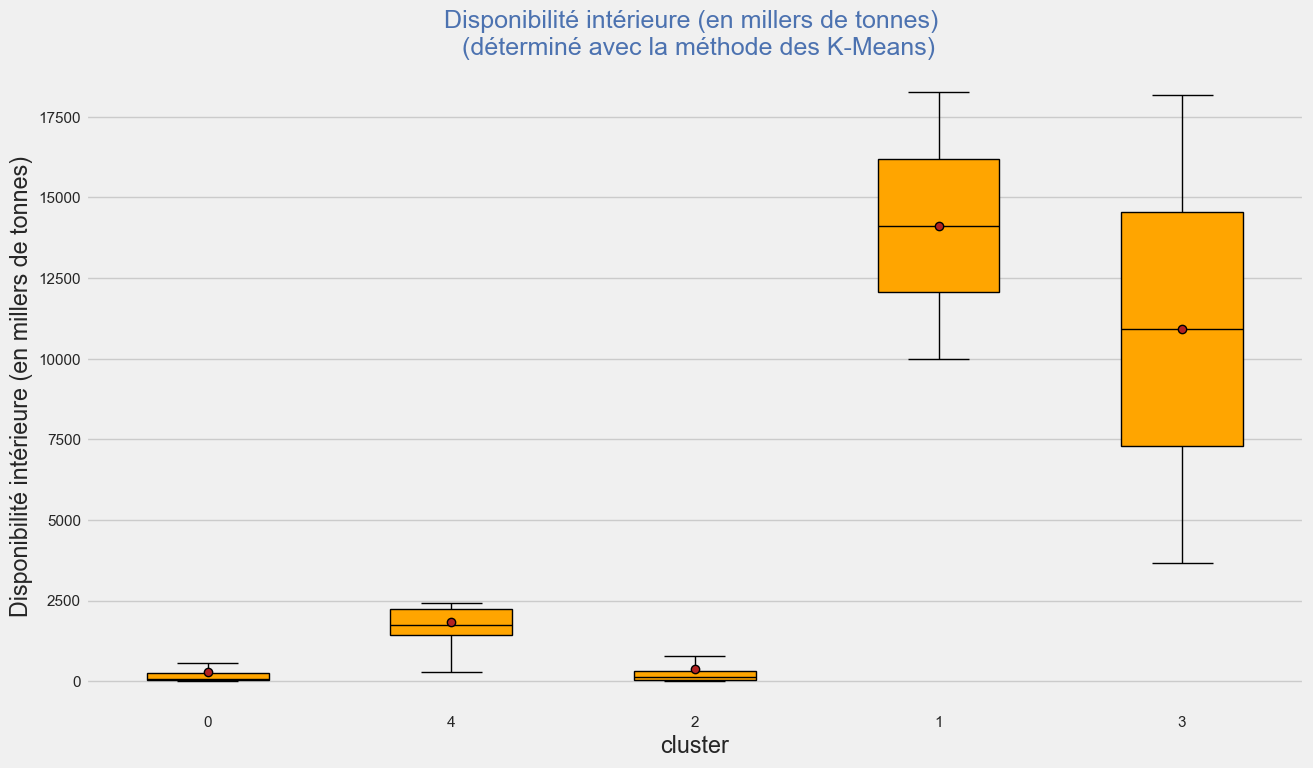

In [82]:
# Comparons les distributions de la variable "Disponibilité intérieure"

C = "cluster"
V = "Disponibilité intérieure" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité intérieure (en millers de tonnes) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité intérieure (en millers de tonnes)")
plt.show()

#### 3. Exportations (en milliers de tonnes)

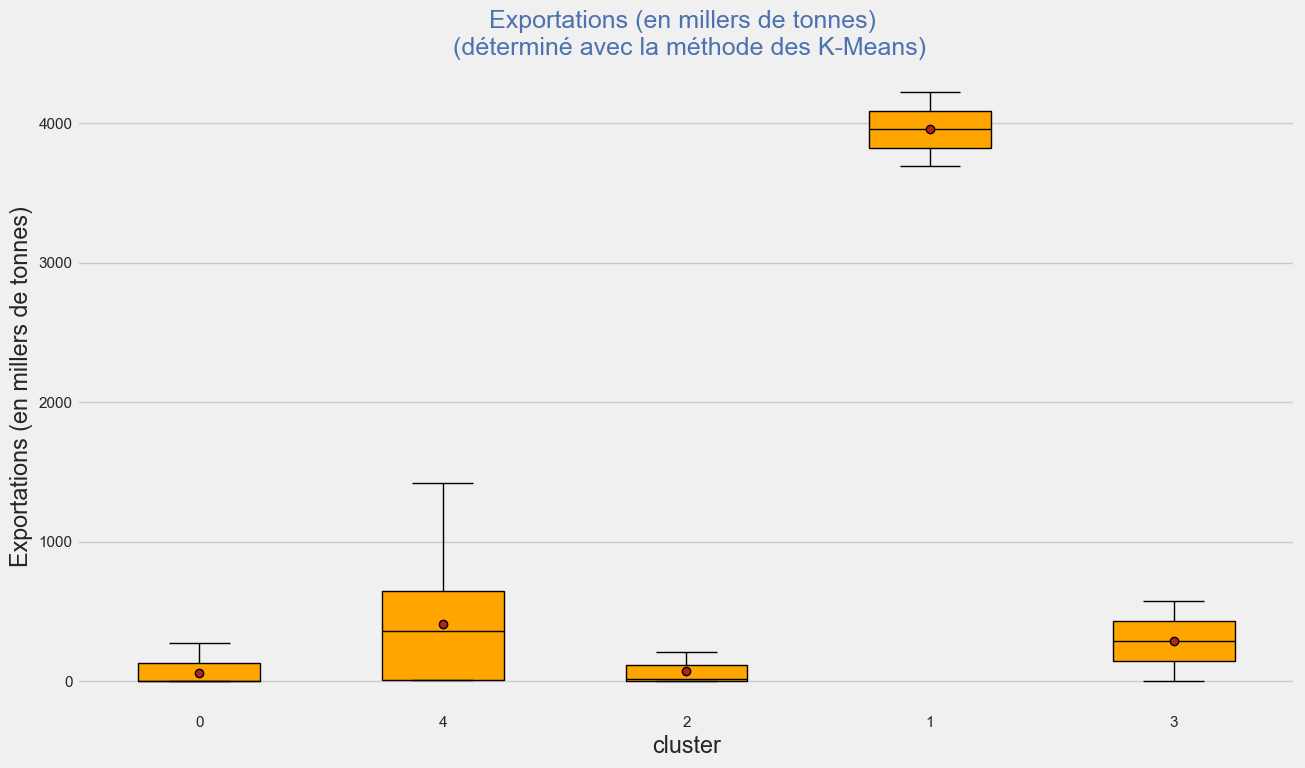

In [83]:
# Comparons les distributions de la variable "Exportations"

C = "cluster"
V = "Exportations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Exportations (en millers de tonnes) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Exportations (en millers de tonnes)")
plt.show()

#### 4. Importations (en milliers de tonnes)

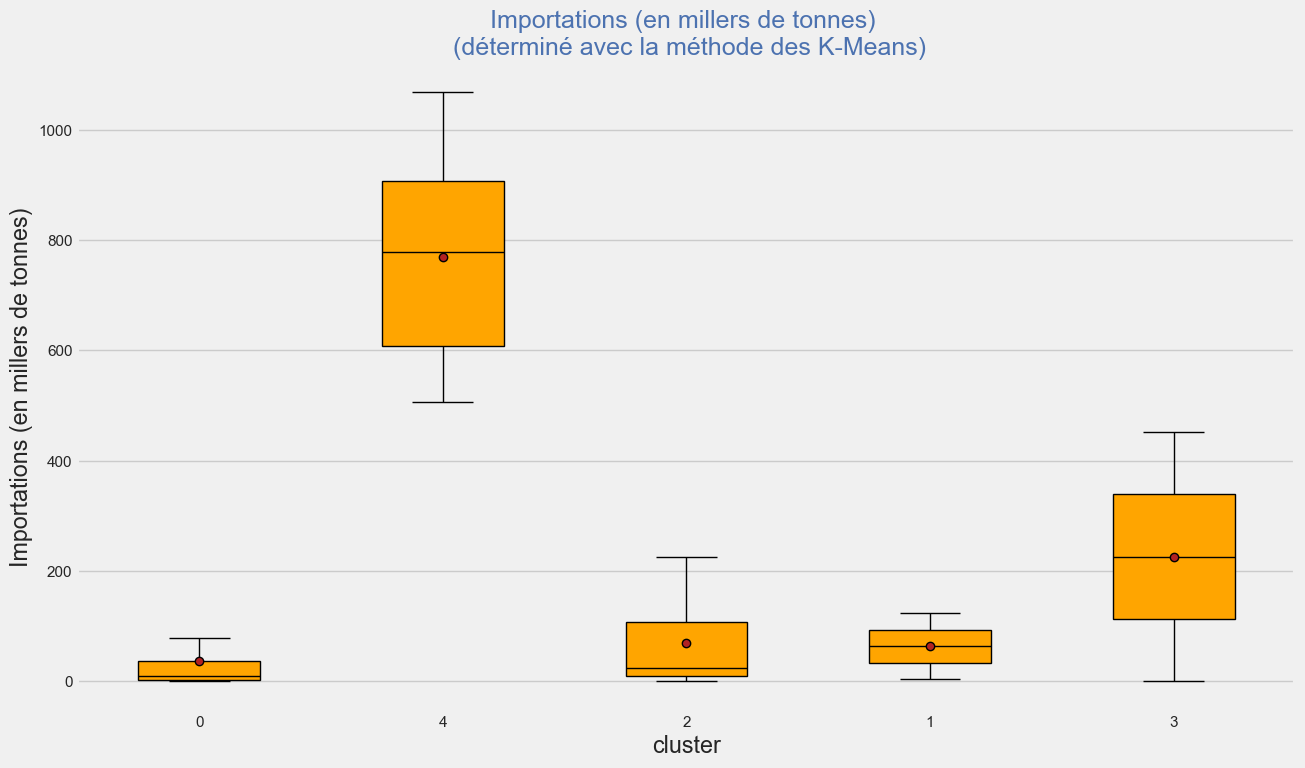

In [84]:
# Comparons les distributions de la variable "Importations"

C = "cluster"
V = "Importations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Importations (en millers de tonnes) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp =plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Importations (en millers de tonnes)")
plt.show()

#### 5. PIB par habitant (en dollars américain)

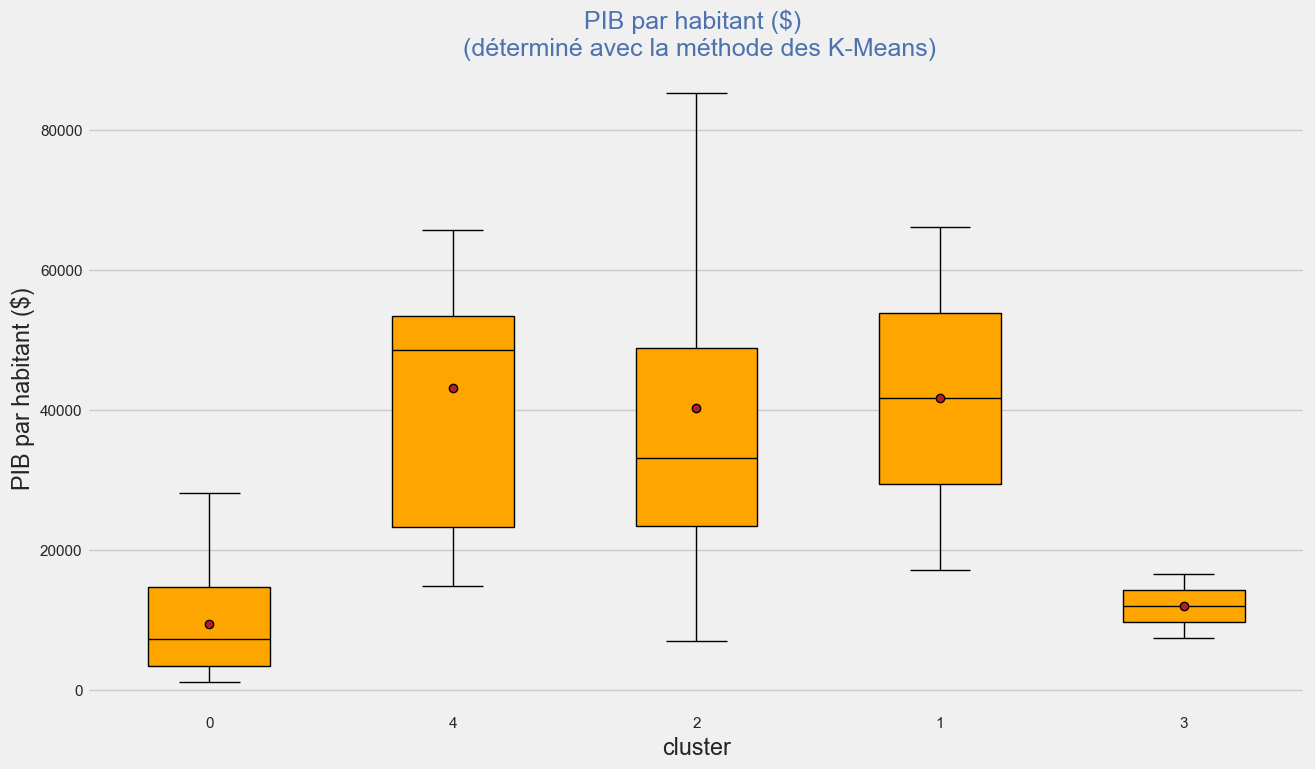

In [85]:
# Comparons les distributions de la variable "PIB_par_habitant"

C = "cluster"
V = "PIB_par_habitant" 

plt.figure(figsize = (14,8))
plt.title("PIB par habitant ($) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("PIB par habitant ($)")
plt.show()

#### 6. Production (en milliers de tonnes)

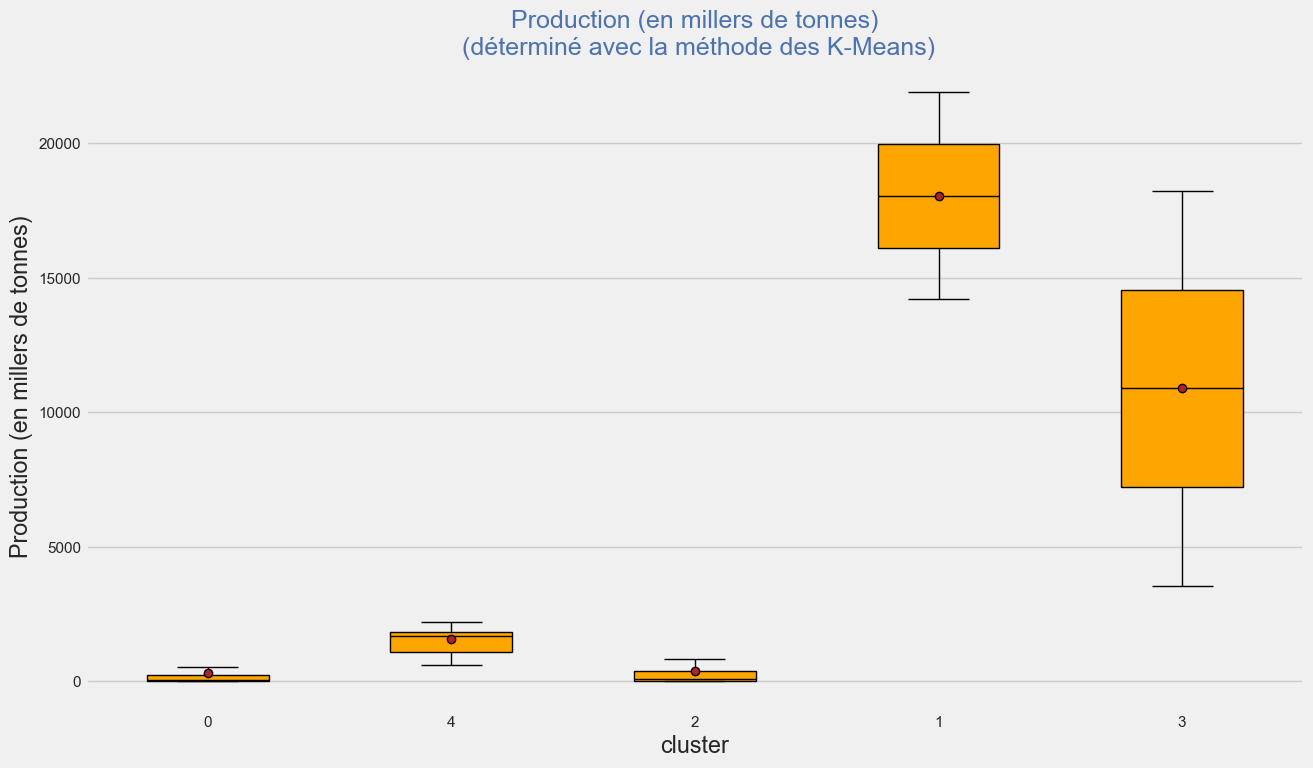

In [86]:
# Comparons les distributions de la variable "Production"

C = "cluster"
V = "Production" 

plt.figure(figsize = (14,8))
plt.title("Production (en millers de tonnes)\n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Production (en millers de tonnes)")
plt.show()

#### 7. Stabilité politique

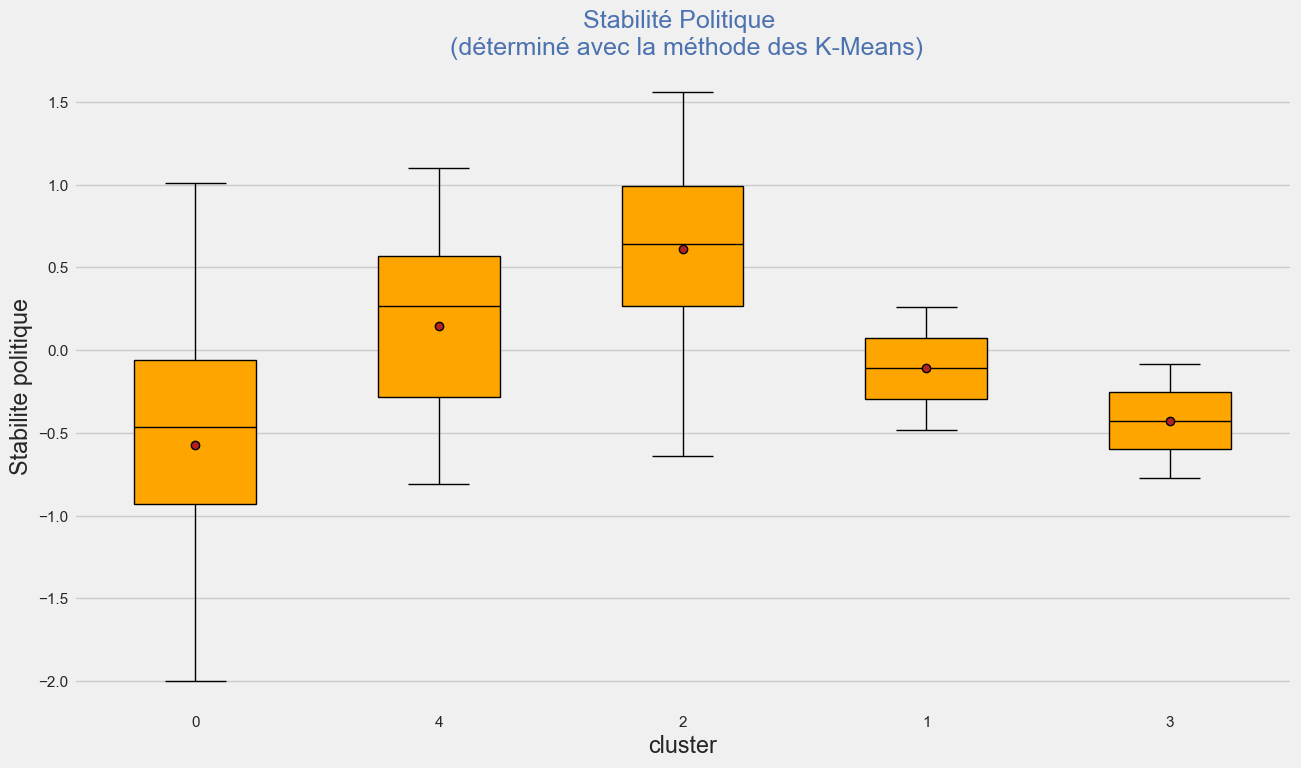

In [87]:
# Comparons les distributions de la variable "Stabilite_politique"

C = "cluster"
V = "Stabilite politique" 

plt.figure(figsize = (14,8))
plt.title("Stabilité Politique \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Stabilite politique")
plt.show()

#### 8. Population (en milliers d'habitants)

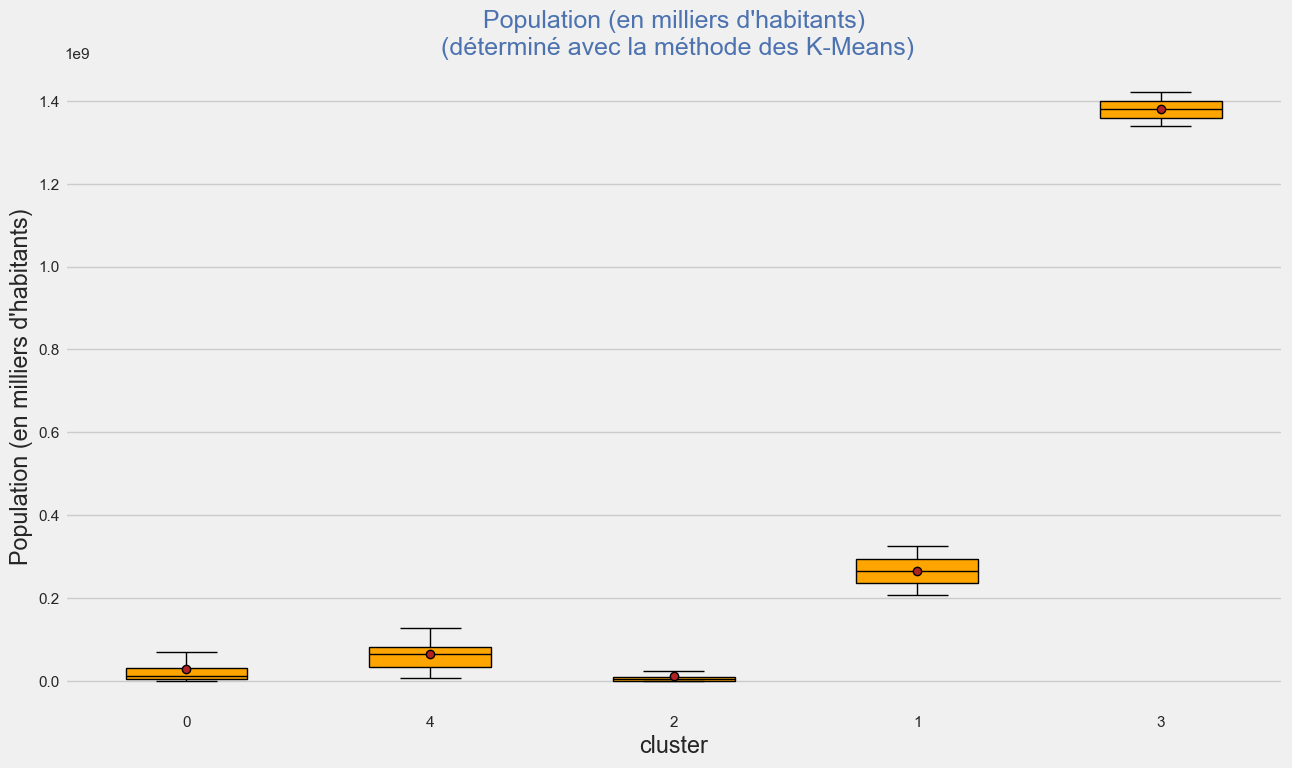

In [88]:
# Comparons les distributions de la variable "Population"

C = "cluster"
V = "Population" 

plt.figure(figsize = (14,8))
plt.title("Population (en milliers d'habitants)\n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = La_poule_qui_chante_clustering_Kmeans_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(La_poule_qui_chante_clustering_Kmeans_bis[La_poule_qui_chante_clustering_Kmeans_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Population (en milliers d'habitants)")
plt.show()

#### Centroïdes

In [89]:
# On scale

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
# On reprend notre dataFrame avec nos données scalées

La_poule_qui_chante_X_scaled.head()

Dispo alim (kg/personne/an)  Disponibilité intérieure  \
Zone                                                                    
Afghanistan                       -1.181435                 -0.290861   
Afrique du Sud                     0.978658                  0.659773   
Albanie                           -0.243666                 -0.295473   
Algérie                           -0.874747                 -0.189386   
Allemagne                         -0.047007                  0.484960   

                Exportations - Quantité  Importations - Quantité  Production  \
Zone                                                                           
Afghanistan                    0.000000                -0.327124   -0.282855   
Afrique du Sud                -0.152561                 2.294003    0.382099   
Albanie                       -0.291483                -0.278485   -0.288941   
Algérie                       -0.291483                -0.473043   -0.182646   
Allemagne                      1.133020                 4.066642    0.320026   

                population  PIB_par_habitant  Stabilite_politique  
Zone                                                               
Afghanistan      -0.042889         -0.890003            -3.087433  
Afrique du Sud    0.092833         -0.367353            -0.225958  
Albanie          -0.261814         -0.393528             0.515061  
Algérie          -0.009518         -0.412198            -0.955577  
Allemagne         0.260891          1.691221             0.743067

In [91]:
# J'ajoute la variable 'cluster'

La_poule_qui_chante_X_scaled['cluster'] = kmeans.labels_
La_poule_qui_chante_X_scaled

Dispo alim (kg/personne/an)  Disponibilité intérieure  \
Zone                                                                           
Afghanistan                              -1.181435                 -0.290861   
Afrique du Sud                            0.978658                  0.659773   
Albanie                                  -0.243666                 -0.295473   
Algérie                                  -0.874747                 -0.189386   
Allemagne                                -0.047007                  0.484960   
...                                            ...                       ...   
Émirats arabes unis                       1.470623                 -0.127118   
Équateur                                 -0.057124                 -0.159866   
États-Unis d'Amérique                     2.242716                  8.108021   
Éthiopie                                 -1.269963                 -0.310695   
Îles Salomon                             -0.996790                 -0.315768   

                       Exportations - Quantité  Importations - Quantité  \
Zone                                                                      
Afghanistan                           0.000000                -0.327124   
Afrique du Sud                       -0.152561                 2.294003   
Albanie                              -0.291483                -0.278485   
Algérie                              -0.291483                -0.473043   
Allemagne                             1.133020                 4.066642   
...                                        ...                      ...   
Émirats arabes unis                  -0.084203                 1.856248   
Équateur                             -0.291483                -0.483852   
États-Unis d'Amérique                 7.849794                 0.180888   
Éthiopie                              0.000000                -0.478447   
Îles Salomon                         -0.291483                -0.451425   

                       Production  population  PIB_par_habitant  \
Zone                                                              
Afghanistan             -0.282855   -0.042889         -0.890003   
Afrique du Sud           0.382099    0.092833         -0.367353   
Albanie                 -0.288941   -0.261814         -0.393528   
Algérie                 -0.182646   -0.009518         -0.412198   
Allemagne                0.320026    0.260891          1.691221   
...                           ...         ...               ...   
Émirats arabes unis     -0.274741   -0.218549          2.064922   
Équateur                -0.156275   -0.170729         -0.379297   
États-Unis d'Amérique    8.596457    1.849341          1.891269   
Éthiopie                -0.288535    0.416452         -0.921001   
Îles Salomon            -0.294215   -0.276545         -0.892650   

                       Stabilite_politique  cluster  
Zone                                                 
Afghanistan                      -3.087433        0  
Afrique du Sud                   -0.225958        4  
Albanie                           0.515061        0  
Algérie                          -0.955577        0  
Allemagne                         0.743067        4  
...                                    ...      ...  
Émirats arabes unis               0.777268        2  
Équateur                          0.002048        0  
États-Unis d'Amérique             0.389658        1  
Éthiopie                         -1.822000        0  
Îles Salomon                      0.309856        0  

[172 rows x 9 columns]

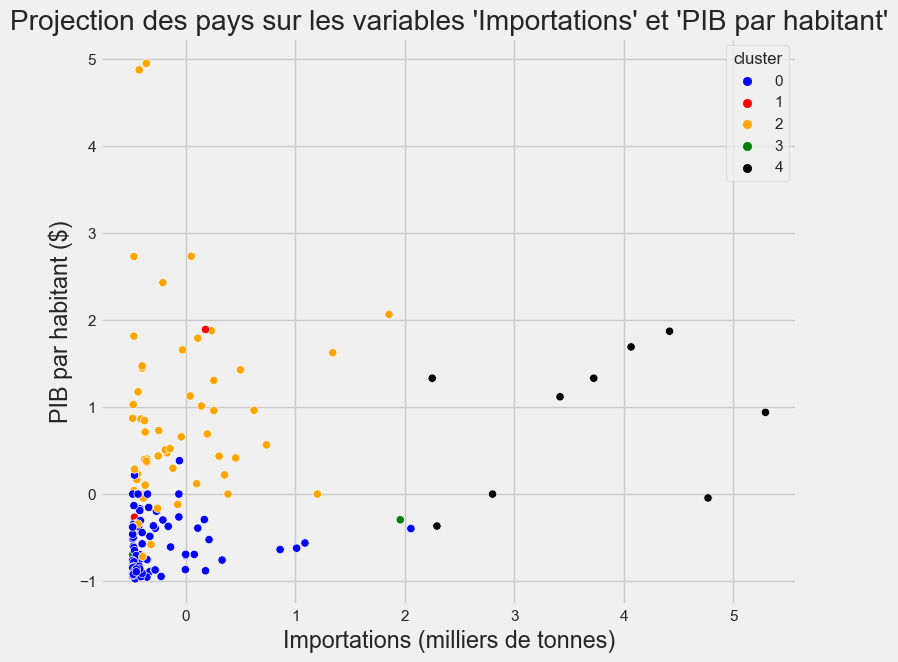

In [92]:
# On peut afficher nos points coloriés en fonction du cluster auquel ils appartiennent

# Je peux projeter mes pays sur les variables 'importations' et 'PIB par habitant'

fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'Importations' et 'PIB par habitant'")
sns.scatterplot(data = La_poule_qui_chante_X_scaled, x = 'Importations - Quantité', y = 'PIB_par_habitant', hue = "cluster",  palette = {0:'blue',1:'red',2:'orange',3:'green',4:'black'})
ax.set_xlabel("Importations (milliers de tonnes)")
ax.set_ylabel("PIB par habitant ($)")
plt.show()

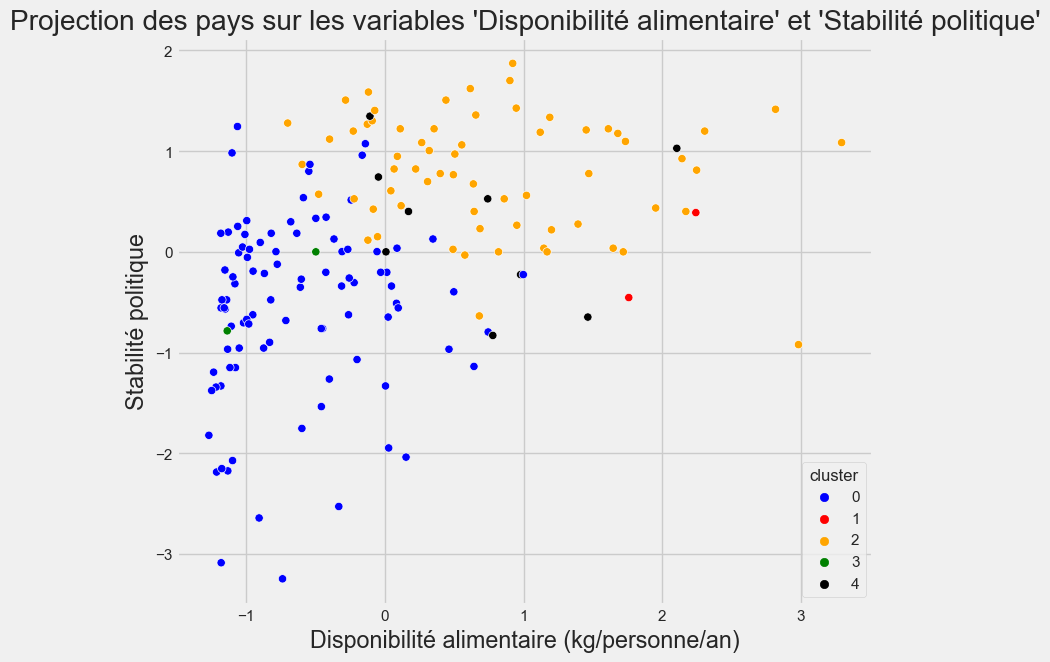

In [93]:
# Je projette mes pays sur les variables 'Stabilité Politique' et 'Disponibilité alimentaire'

fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'Disponibilité alimentaire' et 'Stabilité politique'")
sns.scatterplot(data =La_poule_qui_chante_X_scaled, x = 'Dispo alim (kg/personne/an)', y = 'Stabilite_politique',  hue = "cluster", palette = {0:'blue',1:'red',2:'orange',3:'green',4:'black'})
ax.set_xlabel("Disponibilité alimentaire (kg/personne/an)")
ax.set_ylabel("Stabilité politique")
plt.show()

In [94]:
# On peut stocker nos centroïdes dans une variable 'centroids' : 

centroids = kmeans.cluster_centers_
centroids

array([[-0.6278431 , -0.17862925, -0.15657867, -0.28676052, -0.17109692,
        -0.0903058 , -0.60795363, -0.56069023],
       [ 2.00084426,  6.19752828,  8.43525196, -0.14337519,  7.03184616,
         1.46520969,  0.81308541, -0.03215294],
       [ 0.7778831 , -0.14981805, -0.12826722, -0.11186346, -0.14215601,
        -0.20373478,  0.74831304,  0.78787255],
       [-0.8181522 ,  4.71553536,  0.34799952,  0.73753978,  4.12414125,
         8.76047753, -0.49556892, -0.39228635],
       [ 0.67660729,  0.52257729,  0.60991796,  3.67092055,  0.33458625,
         0.14223682,  0.87469563,  0.2602272 ]])

In [95]:
# On peut maintenant afficher la projection de chaque centroïde sur chaque variable
# On scale
# On utilise bien le scaler déjà entrainé : 

centroids_projection = scaler.fit_transform(centroids)
centroids_projection = pd.DataFrame(centroids_projection, index=["cluster_0", "cluster_1", "cluster_2","cluster_3","cluster_4"], columns = ["Dispo alim (kg/personne/an)","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Production","population","PIB_par_habitant","Stabilite_politique"])
centroids_projection

Dispo alim (kg/personne/an)  Disponibilité intérieure  \
cluster_0                    -0.998042                 -0.890760   
cluster_1                     1.549799                  1.475683   
cluster_2                     0.364451                 -0.880067   
cluster_3                    -1.182498                  0.925657   
cluster_4                     0.266290                 -0.630514   

           Exportations - Quantité  Importations - Quantité  Production  \
cluster_0                -0.595947                -0.710022   -0.834021   
cluster_1                 1.992347                -0.613983    1.662240   
cluster_2                -0.587418                -0.592877   -0.823991   
cluster_3                -0.443943                -0.023947    0.654542   
cluster_4                -0.365039                 1.940829   -0.658771   

           population  PIB_par_habitant  Stabilite_politique  
cluster_0   -0.614555         -1.304676            -1.191777  
cluster_1   -0.160440          0.815465            -0.093023  
cluster_2   -0.647669          0.718827             1.611695  
cluster_3    1.969330         -1.137002            -0.841689  
cluster_4   -0.546667          0.907386             0.514794

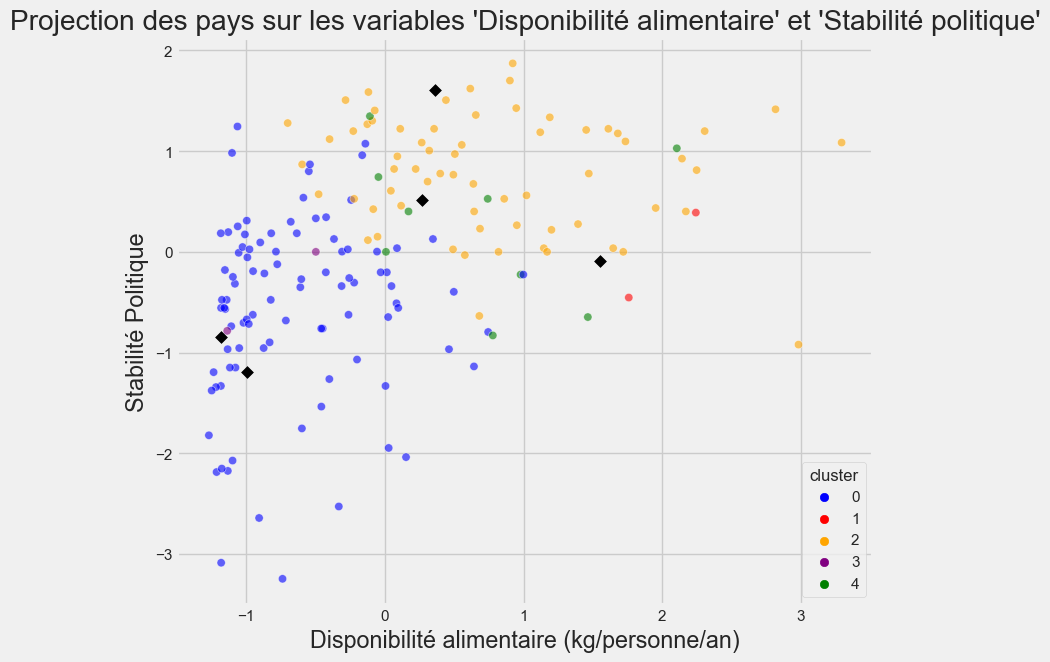

In [96]:
# On affiche le graphique pour les variables Stabilité Politique et Disponibilité alimentaire

# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'Disponibilité alimentaire' et 'Stabilité politique'")

# On affiche nos individus, avec une transparence de 40% (alpha=0.6) : 
sns.scatterplot(data = La_poule_qui_chante_X_scaled, x = 'Dispo alim (kg/personne/an)', y = 'Stabilite_politique', hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'green'}, alpha =0.6)

# On affiche nos centroides, avec une couleur noire (c="black") et une forme de losange (marker="D") : 
ax.scatter(centroids_projection.iloc[:, 0], centroids_projection.iloc[:, 7],  marker="D", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("Disponibilité alimentaire (kg/personne/an)")
ax.set_ylabel("Stabilité Politique")
plt.savefig('Projection des pays sur les variables Disponibilité alimentaire et Stabilité politique', dpi=300, bbox_inches='tight') 
plt.show()

On peut faire la même chose mais au lieu de projeter sur les variables originales, on projette sur les composantes principales F1, F2...

In [97]:
pca = PCA(n_components=6)
pca.fit(X_scaled)

PCA(n_components=6)

In [98]:
# on projette nos points dans le "nouvel espace" :

X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, index = pays, columns = ["F1", "F2", "F3", "F4", "F5", "F6"])
X_proj[:10]

F1        F2        F3        F4        F5        F6
Zone                                                                          
Afghanistan        -0.798781 -2.823379 -0.322445 -1.143447 -0.045813  1.397144
Afrique du Sud      1.100138  0.465977 -1.671942 -1.096405  1.109647 -0.491910
Albanie            -0.673687  0.031419  0.222490  0.245388 -0.064792 -0.550239
Algérie            -0.654871 -1.251588 -0.009411 -0.011508 -0.265260  0.387312
Allemagne           2.076428  1.980798 -3.096308 -1.405769 -1.112502 -0.568681
Angola             -0.392809 -0.574164 -1.054495 -0.510324 -0.032898 -0.495133
Antigua-et-Barbuda -0.243511  1.719447  0.863569  0.176198  1.486845 -0.011073
Arabie saoudite     1.079785  1.627271 -2.824307 -1.629903  0.948516  0.578994
Argentine           0.893188  0.757810  0.823407  0.086604  0.873951  0.284056
Arménie            -0.710015 -0.614233  0.069987 -0.207772  0.093746  0.242797

In [99]:
# On instancie notre Kmeans avec 5 clusters : 
kmeans_pca = KMeans(n_clusters=5)

# On l'entraine : 
kmeans_pca.fit_transform(X_proj)

array([[ 5.93304952,  2.60524487, 13.83560501,  4.653472  , 11.40431605],
       [ 2.01565043,  3.21995635, 12.59552814,  2.9979179 , 10.47551311],
       [ 4.47860052,  1.19337202, 13.47662982,  1.58401313, 11.28741294],
       [ 4.92220051,  0.55924443, 13.48404206,  2.70218946, 10.97861851],
       [ 1.32811878,  5.32908263, 12.47506258,  4.60315344, 11.07988296],
       [ 3.60231443,  1.32798341, 13.51956623,  2.53382806, 10.99631072],
       [ 4.7036538 ,  3.24953816, 13.29347264,  1.54876431, 11.77201977],
       [ 1.57069818,  4.62459473, 13.25894986,  3.92534559, 11.34128229],
       [ 4.22811572,  2.59561158, 12.01072483,  1.45862229, 10.57789734],
       [ 4.5693204 ,  0.52069946, 13.48009975,  2.10109273, 11.25569547],
       [ 4.39954376,  3.58628983, 12.68091478,  1.34772081, 11.26729416],
       [ 4.08679002,  3.08720401, 13.32070483,  1.48442169, 11.50342412],
       [ 4.60820671,  0.57061357, 13.45833482,  2.19253092, 11.19002284],
       [ 4.42166232,  2.91466523, 13.1

In [100]:
# On peut stocker nos clusters dans une variable labels : 
label = kmeans_pca.labels_
label

array([1, 0, 1, 1, 0, 1, 3, 0, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 2,
       3, 1, 3, 1, 1, 1, 1, 3, 3, 0, 3, 3, 4, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       3, 1, 3, 3, 1, 3, 3, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       4, 1, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       1, 3, 1, 1, 1, 3, 1, 0, 1, 3, 3, 3, 1, 3, 0, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1])

In [101]:
# Je rajoute la variable 'cluster' au dataframe

X_proj['cluster'] = label
X_proj.head()

F1        F2        F3        F4        F5        F6  \
Zone                                                                         
Afghanistan    -0.798781 -2.823379 -0.322445 -1.143447 -0.045813  1.397144   
Afrique du Sud  1.100138  0.465977 -1.671942 -1.096405  1.109647 -0.491910   
Albanie        -0.673687  0.031419  0.222490  0.245388 -0.064792 -0.550239   
Algérie        -0.654871 -1.251588 -0.009411 -0.011508 -0.265260  0.387312   
Allemagne       2.076428  1.980798 -3.096308 -1.405769 -1.112502 -0.568681   

                cluster  
Zone                     
Afghanistan           1  
Afrique du Sud        0  
Albanie               1  
Algérie               1  
Allemagne             0

In [102]:
# Je calcule la position de mes centroïdes

centroids = kmeans_pca.cluster_centers_
centroids

array([[ 1.75288923,  1.55765468, -2.72126935, -1.53266128,  0.03559986,
        -0.49603534],
       [-0.55030994, -0.95960537,  0.04751577, -0.11280058, -0.10627895,
        -0.03434135],
       [11.79440851, -0.41939366,  4.2408089 , -2.56376784, -1.39366038,
        -0.15176438],
       [-0.05935664,  1.30678449,  0.2523928 ,  0.29293709,  0.14940152,
         0.12511638],
       [ 8.11124796, -3.95909618, -2.43110409,  5.24191551,  1.37302257,
        -0.0683152 ]])

In [103]:
# On utilise bien le scaler déjà entrainé : 

centroids_proj = scaler.fit_transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj, index=["cluster_0", "cluster_1", "cluster_2","cluster_3","cluster_4"], columns = ["F1", "F2", "F3", "F4","F5","F6"] )
centroids_proj 

F1        F2        F3        F4        F5        F6
cluster_0 -0.502204  1.034467 -1.038891 -0.668634  0.027290 -1.799990
cluster_1 -0.972994 -0.234311  0.067894 -0.140558 -0.134151  0.440219
cluster_2  1.550351  0.037972  1.744108 -1.052124 -1.599037 -0.129535
cluster_3 -0.872640  0.908020  0.149791  0.010344  0.156782  1.213933
cluster_4  0.797487 -1.746148 -0.922901  1.850973  1.549116  0.275373

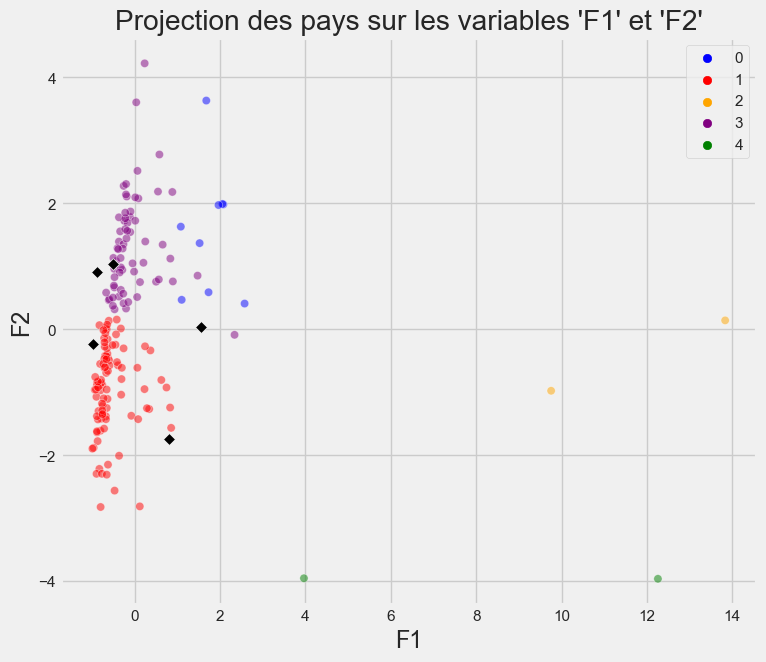

In [104]:
# On affiche le graphique pour F1 et F2 :

# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'F1' et 'F2'")

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
sns.scatterplot(data = X_proj, x = 'F1', y = 'F2', hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'green'}, alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de losange (marker="D") : 
sns.scatterplot(data = centroids_proj, x = 'F1', y = 'F2', marker="D", color ="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.savefig('Projection des pays sur les F1 et F2', dpi=300, bbox_inches='tight') 
plt.show()

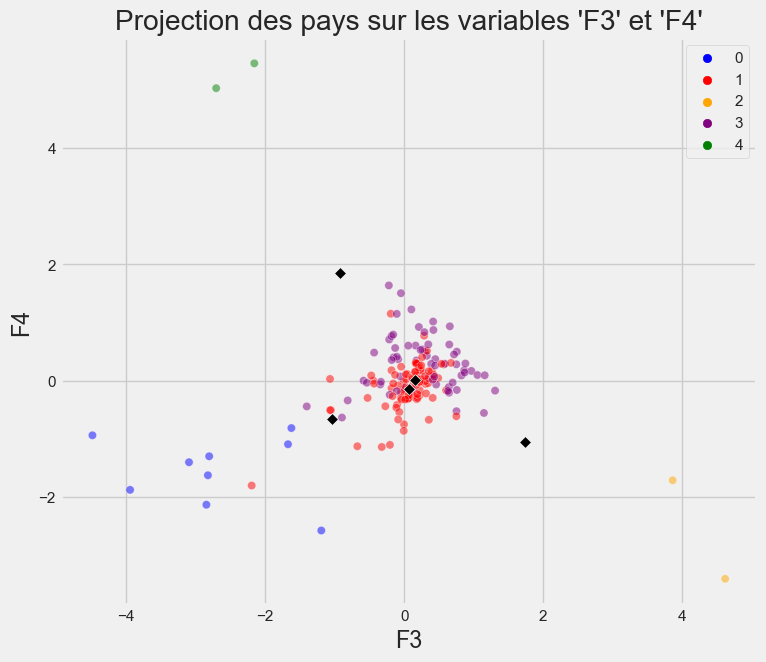

In [105]:
# On affiche le graphique pour F3 et F4 :

# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'F3' et 'F4'")

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
sns.scatterplot(data = X_proj, x = 'F3', y = 'F4', hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'green'}, alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de losange (marker="D") : 
sns.scatterplot(data = centroids_proj, x = 'F3', y = 'F4', marker="D", color ="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F3")
ax.set_ylabel("F4")
plt.savefig('Projection des pays sur les F3 et F4', dpi=300, bbox_inches='tight')
plt.show()

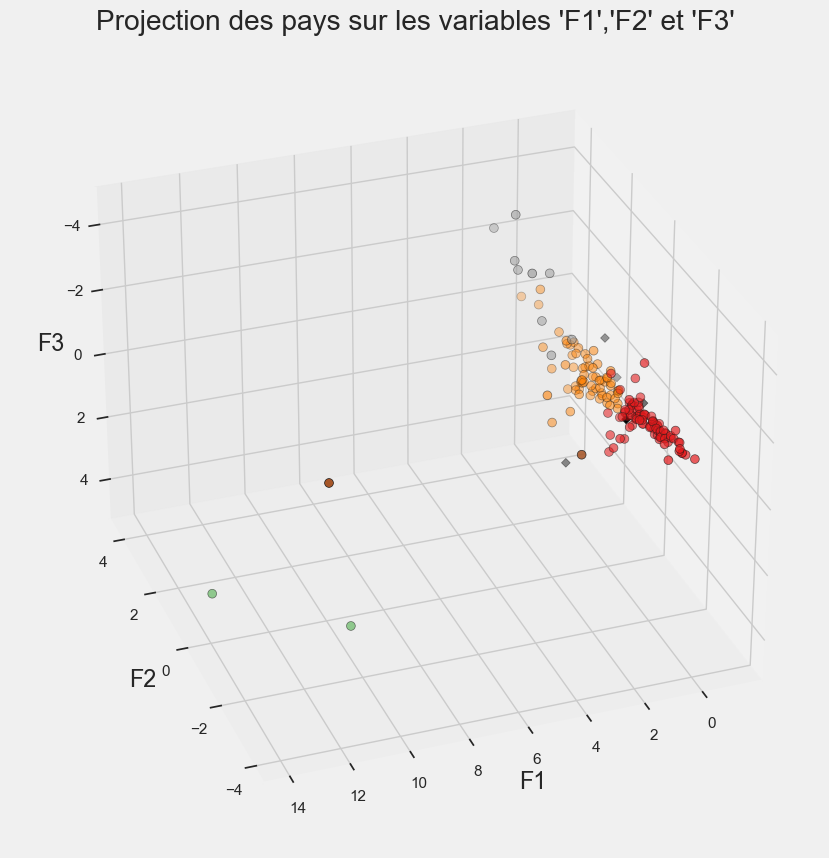

In [106]:
# On peut faire des graphiques à 3 dimensions dans l'espace synthétique : 

# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
plt.title("Projection des pays sur les variables 'F1','F2' et 'F3'")

# On affiche nos points : 
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", edgecolor="k", s=40)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de losange (marker="D") : 
ax.scatter(
    centroids_proj.iloc[:, 0], 
    centroids_proj.iloc[:, 1],
    centroids_proj.iloc[:, 2],
    marker="D", c="black" )

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
plt.show()

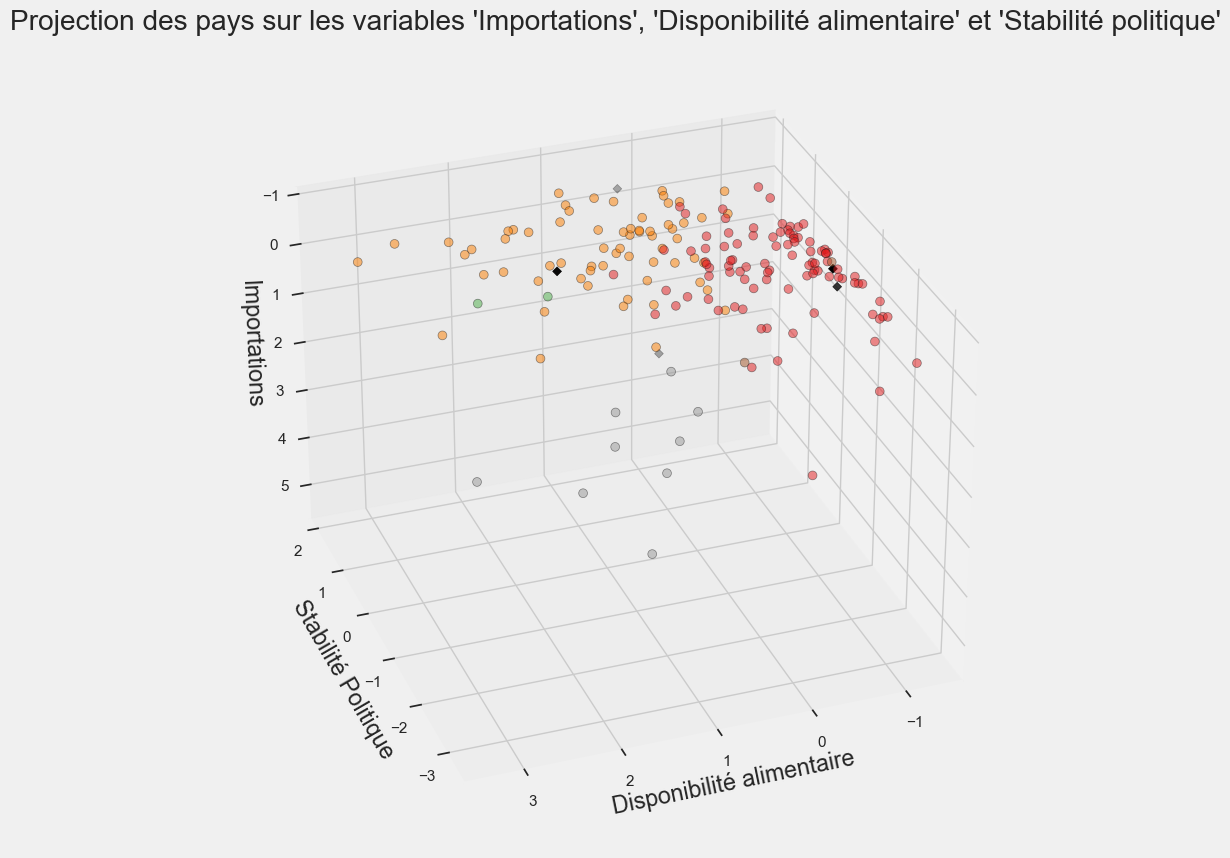

In [107]:
# Ou dans l'espace originel :

# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
plt.title("Projection des pays sur les variables 'Importations', 'Disponibilité alimentaire' et 'Stabilité politique'")

# On affiche nos points : 
ax.scatter(
    La_poule_qui_chante_X_scaled.iloc[:, 0],
    La_poule_qui_chante_X_scaled.iloc[:, 7],
    La_poule_qui_chante_X_scaled.iloc[:, 3],
    c=labels, cmap="Set1", edgecolor="k", s=40, alpha =0.5)

ax.scatter(centroids_projection.iloc[:, 0], centroids_projection.iloc[:, 7], centroids_projection.iloc[:, 3], marker="D", c="black" )

# On spécifie le nom des axes : 
ax.set_xlabel("Disponibilité alimentaire")
ax.set_ylabel("Stabilité Politique")
ax.set_zlabel("Importations")
plt.show()